In [39]:
%load_ext autoreload
%autoreload 2

# file ops
from pathlib import Path
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings(action="ignore", category=RuntimeWarning)

# spatial
import xarray as xa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray

# machine learning
from dask.distributed import get_client, Client, LocalCluster, SSHCluster
from concurrent.futures import ThreadPoolExecutor

# custom
from coralshift.utils import file_ops, config, utils
from coralshift.dataloading import get_data
from coralshift.plotting import spatial_plots, visualise_results
from coralshift.machine_learning import static_models, run_model, ml_results
from coralshift.processing import ml_processing
from coralshift.processing import spatial_data

# import cmipper
from cmipper import utils as cmipper_utils

# data fps
gt_data_dir = config.gt_data_dir
config_fp = "/maps/rt582/coralshift/runs/config_files/config_test.yaml"
config_info = file_ops.read_yaml(config_fp)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:


gebco_xa = get_data.ReturnRaster(config_info=config_info).get_raw_raster(dataset="gebco")
resolutions = [
    1, 0.75, 0.5, 0.25, 0.1, 0.01, 
    # gebco_xa.rio.resolution()[0]
    ]

Loading gebco elevation xarray across [-30.1, -1.9] latitudes & [139.9, 166.1] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.


In [ ]:
arrays = {}

for res in tqdm(resolutions, total=len(resolutions)):
    config_info["resolution"] = res
    array = ml_processing.ProcessMLData(config_info=config_info).get_merged_datasets()
    arrays[res] = array


In [42]:
# generate and store ml ready data for range of resolutions. 30 minutes to run
tr_te_dfs_dict = {}

for res in tqdm(resolutions, total=len(resolutions)):
    config_info["resolution"] = res
    (tr, te, _), extra_info = ml_processing.ProcessMLData(config_info=config_info).generate_ml_ready_data()

    tr_te_dfs_dict[res] = {
        "trains": tr,
        "tests": te,
        "extra_info": extra_info
    }

  0%|          | 0/6 [00:00<?, ?it/s]

Searching for correct CMIP files in: /maps-priv/maps/rt582/coralshift/data/env_vars/cmip6/EC-Earth3P-HR/r1i1p2f1/regridded
	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


	applying spatial buffering...
360 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 360/360 [00:22<00:00, 15.91it/s]


	resampling dataset to 1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading UNEP_GDCR xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


	resampling dataset to 1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-31, -1] latitudes & [139, 167] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

Transposing filled array to match the original shape.


	resampling dataset to 1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-31, -1] latitudes & [139, 167] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
calculating slopes from bathymetry...
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:12<00:00, 12.31s/it]

Transposing filled array to match the original shape.


	resampling dataset to 1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326


 17%|█▋        | 1/6 [01:44<08:42, 104.49s/it]

	fitting scaler to X data...
	fitting scaler to y data...

	transforming data...
Searching for correct CMIP files in: /maps-priv/maps/rt582/coralshift/data/env_vars/cmip6/EC-Earth3P-HR/r1i1p2f1/regridded
	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]


	applying spatial buffering...
360 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 360/360 [00:21<00:00, 16.59it/s]


	resampling dataset to 0.75 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading UNEP_GDCR xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


	resampling dataset to 0.75 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.75, -1.25] latitudes & [139.25, 166.75] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]

Transposing filled array to match the original shape.


	resampling dataset to 0.75 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.75, -1.25] latitudes & [139.25, 166.75] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
calculating slopes from bathymetry...
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:12<00:00, 12.58s/it]

Transposing filled array to match the original shape.


	resampling dataset to 0.75 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326


 33%|███▎      | 2/6 [03:08<06:09, 92.27s/it] 

	fitting scaler to X data...
	fitting scaler to y data...

	transforming data...
Searching for correct CMIP files in: /maps-priv/maps/rt582/coralshift/data/env_vars/cmip6/EC-Earth3P-HR/r1i1p2f1/regridded
	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]


	applying spatial buffering...
360 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 360/360 [00:22<00:00, 16.02it/s]


	resampling dataset to 0.5 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading UNEP_GDCR xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]


	resampling dataset to 0.5 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.5, -1.5] latitudes & [139.5, 166.5] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  9.89it/s]

Transposing filled array to match the original shape.


	resampling dataset to 0.5 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.5, -1.5] latitudes & [139.5, 166.5] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
calculating slopes from bathymetry...
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:16<00:00, 16.42s/it]

Transposing filled array to match the original shape.


	resampling dataset to 0.5 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326


 50%|█████     | 3/6 [04:38<04:34, 91.58s/it]

	fitting scaler to X data...
	fitting scaler to y data...

	transforming data...
Searching for correct CMIP files in: /maps-priv/maps/rt582/coralshift/data/env_vars/cmip6/EC-Earth3P-HR/r1i1p2f1/regridded
	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]


	applying spatial buffering...
360 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 360/360 [00:20<00:00, 17.88it/s]


	resampling dataset to 0.25 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading UNEP_GDCR xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


	resampling dataset to 0.25 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.25, -1.75] latitudes & [139.75, 166.25] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

Transposing filled array to match the original shape.


	resampling dataset to 0.25 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.25, -1.75] latitudes & [139.75, 166.25] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
calculating slopes from bathymetry...
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:11<00:00, 11.86s/it]

Transposing filled array to match the original shape.


	resampling dataset to 0.25 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326


 67%|██████▋   | 4/6 [06:00<02:55, 87.70s/it]

	fitting scaler to X data...
	fitting scaler to y data...

	transforming data...
Searching for correct CMIP files in: /maps-priv/maps/rt582/coralshift/data/env_vars/cmip6/EC-Earth3P-HR/r1i1p2f1/regridded
	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]


	applying spatial buffering...
360 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 360/360 [00:21<00:00, 16.64it/s]


	resampling dataset to 0.1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading UNEP_GDCR xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


	resampling dataset to 0.1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.1, -1.9] latitudes & [139.9, 166.1] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

Transposing filled array to match the original shape.


	resampling dataset to 0.1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.1, -1.9] latitudes & [139.9, 166.1] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
calculating slopes from bathymetry...
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:12<00:00, 12.31s/it]

Transposing filled array to match the original shape.


	resampling dataset to 0.1 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326


 83%|████████▎ | 5/6 [07:28<01:27, 87.79s/it]

	fitting scaler to X data...
	fitting scaler to y data...

	transforming data...
Searching for correct CMIP files in: /maps-priv/maps/rt582/coralshift/data/env_vars/cmip6/EC-Earth3P-HR/r1i1p2f1/regridded
	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 9/9 [00:02<00:00,  4.14it/s]


	applying spatial buffering...
360 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 360/360 [00:20<00:00, 17.64it/s]


	resampling dataset to 0.01 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading UNEP_GDCR xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]


	resampling dataset to 0.01 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.01, -1.99] latitudes & [139.99, 166.01] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

Transposing filled array to match the original shape.


	resampling dataset to 0.01 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
Loading gebco elevation xarray across [-30.01, -1.99] latitudes & [139.99, 166.01] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/GEBCO_2023_n90-0_s90-0_w180-0_e180-0.nc.
calculating slopes from bathymetry...
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:12<00:00, 12.00s/it]

Transposing filled array to match the original shape.


	resampling dataset to 0.01 degree(s) resolution...

Resampling pipeline: written raster CRS to EPSG:4326
	fitting scaler to X data...
	fitting scaler to y data...

	transforming data...


100%|██████████| 6/6 [36:07<00:00, 361.32s/it]


In [43]:
# save dataframes to files
for res in tqdm(resolutions, total=len(resolutions)):
    res_str = utils.replace_dot_with_dash(str(round(res, 3)))
    spatial_extent_info = cmipper_utils.lat_lon_string_from_tuples(config_info["lats"], config_info["lons"]).upper()
    if config_info["depth_mask"]:
        fp_root = Path(config.ml_ready_dir) / f"{str(min(config_info["depth_mask"]))}_{str(max(config_info["depth_mask"]))}"
    else:
        fp_root = Path(config.ml_ready_dir)
    tr_X_fp = fp_root / res_str / f"train_X_{res_str}_{spatial_extent_info}.parquet"
    te_X_fp = fp_root / res_str / f"test_X_{res_str}_{spatial_extent_info}.parquet"
    tr_y_fp = fp_root / res_str / f"train_y_{res_str}_{spatial_extent_info}.parquet"
    te_y_fp = fp_root / res_str / f"test_y_{res_str}_{spatial_extent_info}.parquet"

    # Create directories if they don't exist
    tr_X_fp.parent.mkdir(parents=True, exist_ok=True)
    te_X_fp.parent.mkdir(parents=True, exist_ok=True)
    tr_y_fp.parent.mkdir(parents=True, exist_ok=True)
    te_y_fp.parent.mkdir(parents=True, exist_ok=True)

    tr_te_dfs_dict[res]["trains"][0].to_parquet(tr_X_fp)
    pd.DataFrame(tr_te_dfs_dict[res]["trains"][1]).to_parquet(tr_y_fp)
    tr_te_dfs_dict[res]["tests"][0].to_parquet(te_X_fp)
    pd.DataFrame(tr_te_dfs_dict[res]["tests"][1]).to_parquet(te_y_fp)

    tr_te_dfs_dict[res]["trains"][0].to_parquet(tr_X_fp)
    pd.DataFrame(tr_te_dfs_dict[res]["trains"][1]).to_parquet(tr_y_fp)
    tr_te_dfs_dict[res]["tests"][0].to_parquet(te_X_fp)
    pd.DataFrame(tr_te_dfs_dict[res]["tests"][1]).to_parquet(te_y_fp)

100%|██████████| 6/6 [00:38<00:00,  6.45s/it]


# Running models

0it [00:00, ?it/s]/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33523 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:35069' processes=4 threads=256, memory=29.80 GiB>

No parameter search available for linear regression or maxent.


Training the lin_reg model on latitude  longitude
-21.0     150.0        0.260180
-13.0     141.0        0.000000
-11.0     143.0        0.505488
-15.0     141.0        0.000000
-16.0     141.0        0.000000
-17.0     140.0        0.014232
-8.0      144.0        0.000000
-17.0     146.0        0.480853
-20.0     150.0        0.598096
-16.0     140.0        0.002632
-9.0      140.0        0.000000
-11.0     142.0        0.049724
-12.0     142.0        0.002132
-30.0     153.0        0.000000
-11.0     141.0        0.000000
          140.0        0.000000
-22.0     152.0        0.559651
-18.0     140.0        0.000000
-10.0     140.0        0.000000
-24.0     152.0        0.154196
-9.0      143.0        0.146470
-14.0     140.0        0.000000
-23.0     151.0        0.017508
-10.0     141.0        0.000000
-13.0     140.0        0.000000
-10.0   

/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46269 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:39839' processes=4 threads=256, memory=29.80 GiB>
['random']
RANDOM SEARCH

Running parameter search for rf_reg...
DF SHAPE IN PARAMETER SEARCH (35, 362)
NUM POINTS IN PARAMETER SEARCH 35
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=16)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[CV 3/3; 21/100] START bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 2/3; 20/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 3/3; 17/100] START bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1400[CV 3/3; 40/100] START bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400

[CV 3/3; 38/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000
[CV 2/3; 29/100] START bootstrap=False, max_depth=80, min_samples_le

[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 35/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=1200
[CV 2/3; 36/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1800
[CV 1/3; 37/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 37/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800
[CV 2/3; 38/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000
[CV 1/3; 39/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 39/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200[CV 2/3; 40/100] START bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400

[CV 1/3; 41/100] START bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=10, n_estimators=600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 3/3; 41/100] START bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=10, n_estimators=600
[CV 2/3; 42/100] START bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=200[CV 1/3; 43/100] START bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=1200



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 3/3; 23/100] START bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800
[CV 3/3; 43/100] START bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=1200[CV 2/3; 44/100] START bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=1600
[CV 1/3; 45/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1600
[CV 3/3; 45/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1600

[CV 3/3; 32/100] START bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1200
[CV 1/3; 8/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=800[CV 1/3; 6/100] START bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400

[CV 2/3; 69/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estim

[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.



[CV 3/3; 70/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=1600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 1/3; 70/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=1600
[CV 1/3; 64/100] START bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/3; 63/100] START bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=5, n_estimators=800
[CV 1/3; 60/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=10, n_estimators=1800
[CV 2/3; 59/100] START bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/3; 58/100] START bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1600
[CV 1/3; 58/100] START bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1600
[CV 3/3; 56/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600
[CV 1/3; 56/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_e

[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 46/100] START bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 1/3; 47/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000
[CV 3/3; 50/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400[CV 2/3; 47/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000
[CV 2/3; 71/100] START bootstrap=False, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1400
[CV 3/3; 47/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000[CV 3/3; 36/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1800



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 72/100] START bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600
[CV 3/3; 72/100] START bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600

[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.



[CV 2/3; 48/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 1/3; 49/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 3/3; 49/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 50/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 3/3; 51/100] START bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800[CV 1/3; 51/100] START bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 73/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=1200
[CV 1/3; 74/100] START bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000
[CV 3/3; 74/100] START bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 52/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=1600
[CV 1/3; 53/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600
[CV 3/3; 53/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 64/100] START bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/3; 13/100] START bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1800
[CV 2/3; 57/100] START bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_estimators=800[CV 2/3; 75/100] START bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200[CV 1/3; 76/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600
[CV 3/3; 30/100] START bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200


[CV 2/3; 51/100] START bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800
[CV 3/3; 76/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 54/100] START bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 3/3; 10/100] START bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=1000
[CV 2/3; 54/100] START bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 1/3; 55/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=800


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 55/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=800


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 65/100] START bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400
[CV 2/3; 61/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=600
[CV 1/3; 50/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 3/3; 62/100] START bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 52/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=1600
[CV 3/3; 55/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=800
[CV 2/3; 56/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600
[CV 1/3; 57/100] START bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_estimators=800
[CV 3/3; 52/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=1600[CV 2/3; 53/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600
[CV 3/3; 60/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=10, n_estimators=1800

[CV 1/3; 62/100] START bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400[CV 3/3; 34/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_esti

[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 57/100] START bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_estimators=800[CV 2/3; 58/100] START bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1600

[CV 3/3; 78/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000[CV 2/3; 79/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200

[CV 1/3; 80/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600
[CV 3/3; 80/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 2/3; 3/100] START bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 1/3; 59/100] START bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/3; 59/100] START bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 2/3; 60/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=10, n_estimators=1800[CV 1/3; 61/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=600



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 2/3; 81/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=1400[CV 1/3; 82/100] START bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000

[CV 3/3; 61/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=600
[CV 2/3; 62/100] START bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done  91 out of 200 | elapsed:   13.3s remaining:   15.9s
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.6s finished


[CV 1/3; 63/100] START bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=5, n_estimators=800
[CV 3/3; 63/100] START bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=5, n_estimators=800
[CV 2/3; 64/100] START bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=200


[Parallel(n_jobs=200)]: Using backend ThreadingBackend with 200 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=200)]: Done   2 out of 200 | elapsed:    1.4s remaining:  2.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   11.2s
[Parallel(n_jobs=200)]: Done 200 out of 200 | elapsed:    1.4s finished


[CV 3/3; 82/100] START bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000[CV 2/3; 83/100] START bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 1/3; 84/100] START bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600

[CV 3/3; 64/100] END bootstrap=True, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.219 total time=  15.5s
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:  1.1min
[CV 1/3; 65/100] START bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400[CV 3/3; 65/100] START bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 3/3; 84/100] START bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600[CV 2/3; 85/100] START bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600[CV 1/3; 86/100] START bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200




[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 66/100] START bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   12.6s


[CV 1/3; 67/100] START bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 67/100] START bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 68/100] START bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 86/100] START bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 2/3; 87/100] START bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=600
[CV 1/3; 88/100] START bootstrap=True, max_depth=110, min_samples_leaf=2, min_samples_split=5, n_estimators=400


[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:   20.1s remaining:    7.6s


[CV 1/3; 69/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=1200

[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:   20.5s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 88/100] START bootstrap=True, max_depth=110, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 2/3; 89/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1400
[CV 3/3; 69/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=1200[CV 2/3; 70/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=1600




[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 90/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=1400
[CV 3/3; 90/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=1400


[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    2.3s remaining:    0.9s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    2.3s finished


[CV 1/3; 54/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.552 total time=  24.1s


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 71/100] START bootstrap=False, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1400[CV 3/3; 71/100] START bootstrap=False, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1400



[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:   22.4s remaining:    8.5s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:   22.8s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.


[CV 2/3; 91/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1600[CV 1/3; 92/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=1000

[CV 3/3; 92/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=1000


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 72/100] START bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600[CV 1/3; 73/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=1200

[CV 3/3; 73/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=1200
[CV 2/3; 74/100] START bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   23.8s
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    1.7s finished


[CV 1/3; 50/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.551 total time=  25.8s


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 93/100] START bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 1/3; 94/100] START bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 3/3; 94/100] START bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   28.5s
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 75/100] START bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/3; 75/100] START bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/3; 95/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=800
[CV 1/3; 96/100] START bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1200

[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   27.4s


[CV 2/3; 76/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600[CV 1/3; 77/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=1200[CV 3/3; 77/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=1200




[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done  91 out of 200 | elapsed:   27.9s remaining:   33.4s
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   28.4s finished
[Parallel(n_jobs=200)]: Using backend ThreadingBackend with 200 concurrent workers.


[CV 2/3; 78/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000[CV 1/3; 79/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/3; 79/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 96/100] START bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1200[CV 2/3; 97/100] START bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800[CV 1/3; 98/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000




[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 80/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600
[CV 1/3; 81/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=1400[CV 3/3; 81/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=1400



[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   30.0s
[Parallel(n_jobs=200)]: Done   2 out of 200 | elapsed:    2.0s remaining:  3.3min
[Parallel(n_jobs=200)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 34/100] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.342 total time=  32.5s


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   32.4s


[CV 3/3; 98/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000[CV 2/3; 99/100] START bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=800

[CV 1/3; 100/100] START bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 82/100] START bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000[CV 1/3; 83/100] START bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000

[CV 3/3; 83/100] START bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 100/100] START bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:   35.4s remaining:   13.4s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:   35.4s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   35.4s
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 84/100] START bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600[CV 1/3; 85/100] START bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600
[CV 3/3; 85/100] START bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 86/100] START bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200[CV 1/3; 87/100] START bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=600



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    2.1s finished


[CV 3/3; 62/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.223 total time=  41.1s
[Parallel(n_jobs=16)]: Done   5 out of 300 | elapsed:  1.6min remaining: 93.2min


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 3/3; 87/100] START bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=600[CV 2/3; 88/100] START bootstrap=True, max_depth=110, min_samples_leaf=2, min_samples_split=5, n_estimators=400
[CV 1/3; 89/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1400



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:   39.2s remaining:   14.9s


[CV 3/3; 89/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1400[CV 2/3; 90/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=1400



[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:   39.5s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 1/3; 91/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1600[CV 3/3; 91/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1600

[CV 2/3; 92/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=1000


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   40.7s
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    2.4s remaining:    0.9s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    2.4s finished


[CV 1/3; 62/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.671 total time=  44.5s


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:   40.7s


[CV 1/3; 93/100] START bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 3/3; 93/100] START bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 2/3; 94/100] START bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   49.5s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 738 tasks      | elapsed:   47.0s


[CV 1/3; 95/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=800[CV 3/3; 95/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=800



[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 96/100] START bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1200
[CV 1/3; 97/100] START bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800
[CV 3/3; 97/100] START bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800


[Parallel(n_jobs=8)]: Done 738 tasks      | elapsed:   49.8s
[Parallel(n_jobs=256)]: Done 288 tasks      | elapsed:    3.8s
[Parallel(n_jobs=256)]: Done 1000 out of 1000 | elapsed:    3.9s finished


[CV 3/3; 10/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.202 total time=  57.0s


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.


[CV 2/3; 98/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000[CV 1/3; 99/100] START bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=800
[CV 3/3; 99/100] START bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=800



[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:   55.3s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:   56.3s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.


[CV 2/3; 100/100] START bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1600


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 600 out of 600 | elapsed:    1.9s finished


[CV 2/3; 61/100] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.914 total time=  59.0s


[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:   59.5s finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 288 tasks      | elapsed:    1.6s
[Parallel(n_jobs=256)]: Done 800 out of 800 | elapsed:    1.7s finished


[CV 2/3; 55/100] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=-0.937 total time= 1.0min
[Parallel(n_jobs=16)]: Done   9 out of 300 | elapsed:  1.9min remaining: 60.8min


[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  1.5min remaining:   33.8s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  1.5min finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 288 tasks      | elapsed:    2.1s
[Parallel(n_jobs=256)]: Done 800 out of 800 | elapsed:    2.1s finished


[CV 2/3; 57/100] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.932 total time= 1.1min


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.7min


[CV 3/3; 6/100] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.449 total time= 1.6min


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 738 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 738 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Usi

[CV 2/3; 53/100] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=-0.948 total time= 1.2min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 738 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  1.8min remaining:   41.6s
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  1.8min finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 1288 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  1.2min finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    2.1s remaining:    0.8s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    2.1s finished


[CV 1/3; 46/100] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.659 total time= 2.0min
[Parallel(n_jobs=16)]: Done  13 out of 300 | elapsed:  2.2min remaining: 48.2min


[Parallel(n_jobs=256)]: Done 289 tasks      | elapsed:    3.0s
2024-06-08 15:51:25,334 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write [{'op': 'key-in-memory', 'key': 'batch_of__parallel_build_trees_1_calls-8c53d165dde74eb2b5ef05c119f4c69b', 'type': b'\x80\x05\x95\x15\x00\x00\x00\x00\x00\x00\x00\x8c\x08builtins\x94\x8c\x04list\x94\x93\x94.'}]
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 6074, in send_all
    c.send(*msgs)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:25,337 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while tr

[CV 3/3; 20/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=nan total time= 2.2min[CV 3/3; 42/100] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=nan total time= 2.0min

[CV 3/3; 44/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=nan total time= 2.2min
[CV 1/3; 44/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=nan total time= 2.0min
[CV 1/3; 32/100] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=nan total time= 2.2min
[CV 1/3; 40/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=nan total time= 2.0min[CV 1/3; 14/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=nan total time= 2.1min
[CV 2/3; 9

2024-06-08 15:51:25,474 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-5ff81a3dadb345e88a5a2396960889be'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:25,480 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-5ff81a3dadb345e88a5a2396960889be'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 2/3; 69/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=nan total time= 1.7min
[CV 3/3; 74/100] END bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=nan total time= 1.4min
[CV 1/3; 76/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=nan total time= 1.4min
[CV 2/3; 59/100] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=nan total time= 1.6min
[CV 2/3; 73/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=nan total time= 1.4min
[CV 3/3; 50/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=nan total time= 1.6min
[CV 2/3; 71/100] END bootstrap=False, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1400;, score=nan total time= 1.6min[CV 1/3; 

2024-06-08 15:51:25,706 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-5ff81a3dadb345e88a5a2396960889be'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:25,712 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-5ff81a3dadb345e88a5a2396960889be'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 1/3; 80/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=nan total time= 1.3min
[CV 1/3; 74/100] END bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=nan total time= 1.4min[CV 1/3; 56/100] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=nan total time= 1.6min

[CV 1/3; 78/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=nan total time= 1.3min
[CV 2/3; 75/100] END bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=nan total time= 1.4min
[CV 3/3; 80/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=nan total time= 1.3min
[CV 2/3; 77/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=nan total time= 1.3min
[CV 1/3

2024-06-08 15:51:25,918 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-981de764dbbf417a9e7ad184287c8570'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:25,924 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-981de764dbbf417a9e7ad184287c8570'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 2/3; 87/100] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=nan total time= 1.0min
[CV 1/3; 92/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=nan total time=  57.8s
[CV 1/3; 94/100] END bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=  54.4s
[CV 2/3; 89/100] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1400;, score=nan total time= 1.0min
[CV 2/3; 93/100] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=nan total time=  54.5s
[CV 3/3; 94/100] END bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=  54.5s
[CV 2/3; 97/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800;, score=nan total time=  49.2s
[CV 2/3; 91/

2024-06-08 15:51:26,127 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-981de764dbbf417a9e7ad184287c8570'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:26,130 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-981de764dbbf417a9e7ad184287c8570'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 3/3; 30/100] END bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200;, score=0.201 total time= 1.4min


2024-06-08 15:51:26,698 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-981de764dbbf417a9e7ad184287c8570'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:26,701 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-981de764dbbf417a9e7ad184287c8570'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 2/3; 65/100] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400;, score=-0.973 total time= 1.5min


2024-06-08 15:51:30,789 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-1e4a3a19a7844575b4417bec2126daa3'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:30,790 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-1e4a3a19a7844575b4417bec2126daa3'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 2/3; 14/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.260 total time= 2.3min


2024-06-08 15:51:33,126 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-2987fd1a89a7425cb5c6d45187e31e2d'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 5669, in report
    c.send(msg)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/batched.py", line 156, in send
    raise CommClosedError(f"Comm {self.comm!r} already closed.")
distributed.comm.core.CommClosedError: Comm <TCP (closed) Scheduler->Client local=tcp://127.0.0.1:39839 remote=tcp://127.0.0.1:60584> already closed.
2024-06-08 15:51:33,127 - distributed.scheduler - CRITICAL - Closed comm <BatchedSend: closed> while trying to write {'op': 'key-in-memory', 'key': 'ndarray-2987fd1a89a7425cb5c6d45187e31e2d'}
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distr

[CV 2/3; 6/100] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.080 total time= 2.4min


[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 1600 out of 1600 | elapsed:    3.4s finished
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  1.5min finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.


[CV 3/3; 52/100] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=1600;, score=0.347 total time= 1.5min
[Parallel(n_jobs=16)]: Done  17 out of 300 | elapsed:  2.4min remaining: 40.2min


[Parallel(n_jobs=256)]: Done 289 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  1.5min finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.1min
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 739 tasks      | elapsed:    3.7s
[Parallel(n_jobs=256)]: Done 1289 tasks      | elapsed:    4.3s
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    2.0s finished


[CV 3/3; 1/100] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.195 total time= 2.4min


[Parallel(n_jobs=256)]: Done 288 tasks      | elapsed:    2.3s
[Parallel(n_jobs=256)]: Done 289 tasks      | elapsed:    2.5s
[Parallel(n_jobs=256)]: Done 739 tasks      | elapsed:    2.5s
[Parallel(n_jobs=256)]: Done 1289 tasks      | elapsed:    2.6s
[Parallel(n_jobs=256)]: Done 1800 out of 1800 | elapsed:    2.7s finished
[Parallel(n_jobs=256)]: Done 738 tasks      | elapsed:    3.2s


[CV 2/3; 13/100] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1800;, score=-0.929 total time= 1.6min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  1.5min finished
[Parallel(n_jobs=256)]: Done 1288 tasks      | elapsed:    3.6s
[Parallel(n_jobs=256)]: Done 288 tasks      | elapsed:    3.1s
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 1800 out of 1800 | elapsed:    6.3s finished
[Parallel(n_jobs=256)]: Done 1800 out of 1800 | elapsed:    3.7s finished


[CV 3/3; 60/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=10, n_estimators=1800;, score=0.199 total time= 1.6min
[CV 2/3; 51/100] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800;, score=-1.296 total time= 1.6min
[Parallel(n_jobs=16)]: Done  21 out of 300 | elapsed:  2.5min remaining: 33.0min


[Parallel(n_jobs=256)]: Done 738 tasks      | elapsed:    3.4s
[Parallel(n_jobs=256)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=256)]: Done 738 tasks      | elapsed:    0.6s
[Parallel(n_jobs=256)]: Done 1288 tasks      | elapsed:    0.9s
[Parallel(n_jobs=256)]: Done 1600 out of 1600 | elapsed:    4.0s finished
[Parallel(n_jobs=256)]: Done 2000 out of 2000 | elapsed:    1.0s finished


[CV 1/3; 52/100] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=1600;, score=0.376 total time= 1.6min
[CV 2/3; 3/100] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=-0.958 total time= 1.5min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  2.5min remaining:   56.2s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.5min finished
[Parallel(n_jobs=256)]: Using backend ThreadingBackend with 256 concurrent workers.
[Parallel(n_jobs=256)]: Done 290 out of 400 | elapsed:    2.2s remaining:    0.9s
[Parallel(n_jobs=256)]: Done 400 out of 400 | elapsed:    2.3s finished


[CV 1/3; 1/100] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.547 total time= 2.6min
[Parallel(n_jobs=16)]: Done  25 out of 300 | elapsed:  2.7min remaining: 29.4min
[CV 3/3; 78/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 14/100] START bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400
[CV 2/3; 47/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000
[CV 3/3; 28/100] START bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1600
[CV 2/3; 9/100] START bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1600
[CV 2/3; 37/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800[CV 2/3; 49/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators

[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  2.7min remaining:  1.0min


[CV 1/3; 26/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=600
[CV 2/3; 85/100] START bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600
[CV 3/3; 8/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=800
[CV 3/3; 46/100] START bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 3/3; 84/100] START bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600
[CV 2/3; 11/100] START bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1400
[CV 2/3; 29/100] START bootstrap=False, max_depth=80, min_samples_leaf=2, min_samples_split=5, n_estimators=600
[CV 3/3; 56/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600
[CV 3/3; 88/100] START bootstrap=True, max_depth=110, min_samples_leaf=2, min_samples_split=5, n_estim

[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.7min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.


[CV 3/3; 68/100] START bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=600[CV 2/3; 81/100] START bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=1400
[CV 1/3; 36/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1800

[CV 3/3; 4/100] START bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000
[CV 1/3; 100/100] START bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1600
[CV 3/3; 18/100] START bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 1/3; 32/100] START bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1200


[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  2.7min remaining:  1.0min


[CV 1/3; 15/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.671 total time= 2.8min


[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.8min finished
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  2.7min remaining:  1.0min
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.7min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.7min
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    1.6s finished


[CV 3/3; 21/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.449 total time= 2.8min


[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    1.8s finished


[CV 2/3; 22/100] END bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.153 total time= 2.8min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.8min
2024-06-08 15:52:13,520 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  2.9min remaining:  1.1min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    1.5s finished


[CV 3/3; 15/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.223 total time= 3.0min
[Parallel(n_jobs=16)]: Done  29 out of 300 | elapsed:  3.1min remaining: 29.2min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend 

[CV 1/3; 16/100] START bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1400
[CV 2/3; 25/100] START bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1800


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.


[CV 3/3; 54/100] START bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=400


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 1/3; 21/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.068 total time= 3.7min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:   54.2s
[Parallel(n_jobs=8)]: Done  18 out of 200 | elapsed:  1.1min remaining: 11.0min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.1min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:   55.2s
[Parallel(n_jobs=192)]: Done  18 out of 200 | elapsed:    1.0s remaining:   10.3s
[Parallel(n_jobs=192)]: Done 200 out of 200 | elapsed:    1.1s finished


[CV 2/3; 79/100] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.889 total time= 1.2min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:   57.6s
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  3.4min remaining:  1.3min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  3.5min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of 200 | elapsed:  1.2min remaining: 11.7min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    2.0s finished


[CV 2/3; 40/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.931 total time= 3.5min


[Parallel(n_jobs=8)]: Done  18 out of 200 | elapsed:  1.2min remaining: 12.0min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.1min
[Parallel(n_jobs=192)]: Done  18 out of 200 | elapsed:    2.0s remaining:   20.1s
[Parallel(n_jobs=192)]: Done 200 out of 200 | elapsed:    2.1s finished


[CV 3/3; 94/100] END bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.445 total time= 1.3min
[Parallel(n_jobs=16)]: Done  33 out of 300 | elapsed:  4.0min remaining: 32.7min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.7min
[Parallel(n_jobs=192)]: Done  18 out of 200 | elapsed:    2.6s remaining:   26.7s
[Parallel(n_jobs=192)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Done  18 out of 200 | elapsed:  1.2min remaining: 12.3min


[CV 1/3; 94/100] END bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.083 total time= 1.3min


[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:   52.5s
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.1min
[Parallel(n_jobs=192)]: Done  18 out of 200 | elapsed:    2.0s remaining:   20.5s
[Parallel(n_jobs=192)]: Done 200 out of 200 | elapsed:    2.1s finished


[CV 1/3; 34/100] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.364 total time= 1.4min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:   57.3s
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Do

[CV 2/3; 34/100] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.587 total time= 4.3min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.6min
[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.5s
[Parallel(n_jobs=192)]: Done 416 tasks      | elapsed:    1.6s
[Parallel(n_jobs=192)]: Done 1000 out of 1000 | elapsed:    1.7s finished


[CV 1/3; 31/100] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.693 total time= 4.3min
[Parallel(n_jobs=16)]: Done  37 out of 300 | elapsed:  4.7min remaining: 33.6min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done  91 out of 200 | elapsed:  4.4min remaining:  5.3min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  4.4min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done  91 out

[CV 2/3; 42/100] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.191 total time= 4.6min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.9min
[Parallel(n_jobs=192)]: Done  18 out of 200 | elapsed:    5.9s remaining:   59.4s
[Parallel(n_jobs=192)]: Done 200 out of 200 | elapsed:    5.9s finished


[CV 1/3; 39/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.551 total time= 4.6min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.5min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done  91 out of 200 | elapsed:  4.8min remaining:  5.8min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  4.9min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend wi

[CV 3/3; 39/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.219 total time= 4.9min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 290 out of 400 | elapsed:  4.8min remaining:  1.8min
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    1.8s finished


[CV 2/3; 50/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.942 total time= 4.7min
[Parallel(n_jobs=16)]: Done  41 out of 300 | elapsed:  5.5min remaining: 34.4min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  4.8min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.2min
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    2.0s finished


[CV 2/3; 46/100] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.153 total time= 4.9min


[Parallel(n_jobs=8)]: Done  66 tasks      | elapsed:  2.2min
2024-06-08 15:54:44,420 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  2.6min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  2.7min finished
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.9s
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    2.0s finished


[CV 3/3; 24/100] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=0.250 total time= 2.9min


[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.6min
[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.9s
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    1.9s finished


[CV 1/3; 26/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=0.372 total time= 2.9min


[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    2.5s finished


[CV 3/3; 14/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.203 total time= 3.0min
[Parallel(n_jobs=16)]: Done  45 out of 300 | elapsed:  5.8min remaining: 32.7min


[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.2min
2024-06-08 15:54:59,129 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.2min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  2.9min finished
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  2.9min finished
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.8min
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.8min
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=8)]: Done 288 ta

[CV 2/3; 85/100] END bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.171 total time= 3.1min


[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    2.2s
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    2.6s finished


[CV 3/3; 88/100] END bootstrap=True, max_depth=110, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.239 total time= 3.1min
[CV 2/3; 19/100] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=-1.175 total time= 3.1min


[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  2.9min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.1min
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    1.7s finished


[CV 2/3; 1/100] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.943 total time= 3.2min
[Parallel(n_jobs=16)]: Done  49 out of 300 | elapsed:  5.9min remaining: 30.1min


[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  2.9min finished
[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.8s
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.


[CV 2/3; 29/100] END bootstrap=False, max_depth=80, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-0.685 total time= 3.2min


[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.2min
[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    1.9s finished
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    2.1s finished


[CV 3/3; 68/100] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.208 total time= 3.2min
[CV 3/3; 46/100] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.251 total time= 3.2min


[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.2min
2024-06-08 15:55:09,517 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
[Parallel(n_jobs=192)]: Done 400 out of 400 | elapsed:    3.6s finished
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.3min


[CV 1/3; 6/100] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.068 total time= 3.3min
[Parallel(n_jobs=16)]: Done  53 out of 300 | elapsed:  6.0min remaining: 28.0min


[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.2min
2024-06-08 15:55:22,321 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.4min
[Parallel(n_jobs

[CV 2/3; 54/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.916 total time= 5.5min


[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.5min
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    2.7s finished


[CV 2/3; 41/100] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=-0.939 total time= 3.7min


[Parallel(n_jobs=192)]: Done  18 out of 200 | elapsed:    2.1s remaining:   21.6s
[Parallel(n_jobs=192)]: Done 200 out of 200 | elapsed:    2.2s finished


[CV 3/3; 59/100] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.306 total time= 5.4min


[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.6s
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    1.7s finished


[CV 1/3; 66/100] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=0.685 total time= 3.7min
[Parallel(n_jobs=16)]: Done  57 out of 300 | elapsed:  6.4min remaining: 27.5min


[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=192)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:  5.5min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.3min
[Parallel(n_jobs=192)]: Done  66 tasks      | elapsed:    1.7s
[Parallel(n_jobs=192)]: Done 600 out of 600 | elapsed:    1.8s finished


[CV 1/3; 24/100] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=0.680 total time= 3.7min
[CV 1/3; 42/100] START bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=200[CV 1/3; 2/100] START bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=5, n_estimators=1800[CV 2/3; 77/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=1200[CV 2/3; 67/100] START bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=200[CV 3/3; 86/100] START bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 1/3; 14/100] START bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400[CV 3/3; 16/100] START bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1400[CV 2/3; 73/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_

[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.3min


[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.3min
2024-06-08 15:55:44,316 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.4min


[CV 3/3; 20/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 3/3; 26/100] START bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=600
[CV 2/3; 7/100] START bootstrap=True, max_depth=60, min_samples_leaf=2, min_samples_split=2, n_estimators=1200
[CV 1/3; 22/100] START bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=400[CV 2/3; 31/100] START bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=1000[CV 2/3; 69/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=1200[CV 3/3; 50/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=400
[CV 1/3; 40/100] START bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400
[CV 2/3; 59/100] START bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estim

[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.4min


[CV 1/3; 56/100] START bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600

[CV 1/3; 96/100] START bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1200[CV 2/3; 75/100] START bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200[CV 2/3; 91/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1600




[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.5min
2024-06-08 15:55:54,006 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.6min


[CV 2/3; 89/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1400[CV 2/3; 83/100] START bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 76/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600
[CV 3/3; 90/100] START bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=1400

[CV 1/3; 88/100] START bootstrap=True, max_depth=110, min_samples_leaf=2, min_samples_split=5, n_estimators=400


2024-06-08 15:56:04,918 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 192 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDist

[CV 2/3; 78/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 51/100] START bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800
[CV 1/3; 75/100] START bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 1/3; 12/100] START bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=1800
[CV 1/3; 27/100] START bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 1/3; 58/100] START bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1600
[CV 3/3; 97/100] START bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800
[CV 1/3; 2/100] START bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=5, n_estimators=1800
[CV 1/3; 57/100] START bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_

2024-06-08 15:56:15,541 - distributed.scheduler - ERROR - Error transitioning 'ndarray-645db4eeabd74188b4fe6cc05aa68fff' from 'waiting' to 'queued'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 1958, in _transition
    recommendations, client_msgs, worker_msgs = func(
                                                ^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 2770, in _transition_waiting_queued
    self.queued.add(ts)
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/collections.py", line 99, in add
    heapq.heappush(self._heap, (k, self._inc, vref))
TypeError: '<' not supported between instances of 'NoneType' and 'tuple'
2024-06-08 15:56:15,544 - distributed.scheduler - ERROR - '<' not supported between instances of 'NoneType' and 'tuple'
Traceback (most recent call last):
  File "/maps/rt582

[CV 3/3; 92/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=1000

[CV 1/3; 37/100] START bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800
[CV 2/3; 5/100] START bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 2/3; 12/100] START bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=1800
[CV 3/3; 65/100] START bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400


2024-06-08 15:56:15,776 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7f7cccfe3a70>>, <Task finished name='Task-407424' coro=<DaskDistributedBackend.apply_async.<locals>.f() done, defined at /maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/joblib/_dask.py:332> exception=KeyError('tcp://127.0.0.1:44291')>)
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/tornado/ioloop.py", line 774, in _discard_future_result
    future.result()
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/joblib/_dask.py", line 333, in f
    batch, tasks = await self._to_func_args(func)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 1/3; 80/100] START bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600
[CV 1/3; 35/100] START bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=1200
[CV 3/3; 49/100] START bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=2000





2024-06-08 15:56:15,918 - distributed.worker - WARNING - Scheduler was unaware of this worker; shutting down.


CancelledError: batch_of__fit_and_score_1_calls-2ee865b6bcb5446aa6b3eabb01a60e01

2024-06-08 15:56:16,045 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:16,048 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  


[CV 1/3; 98/100] START bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000[CV 1/3; 95/100] START bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=800


[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.9min


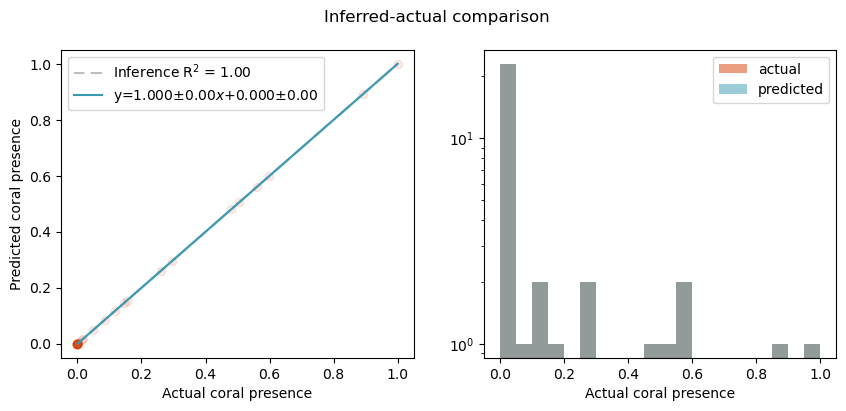

[CV 1/3; 76/100] START bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600[CV 1/3; 79/100] START bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200

[CV 2/3; 82/100] START bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000


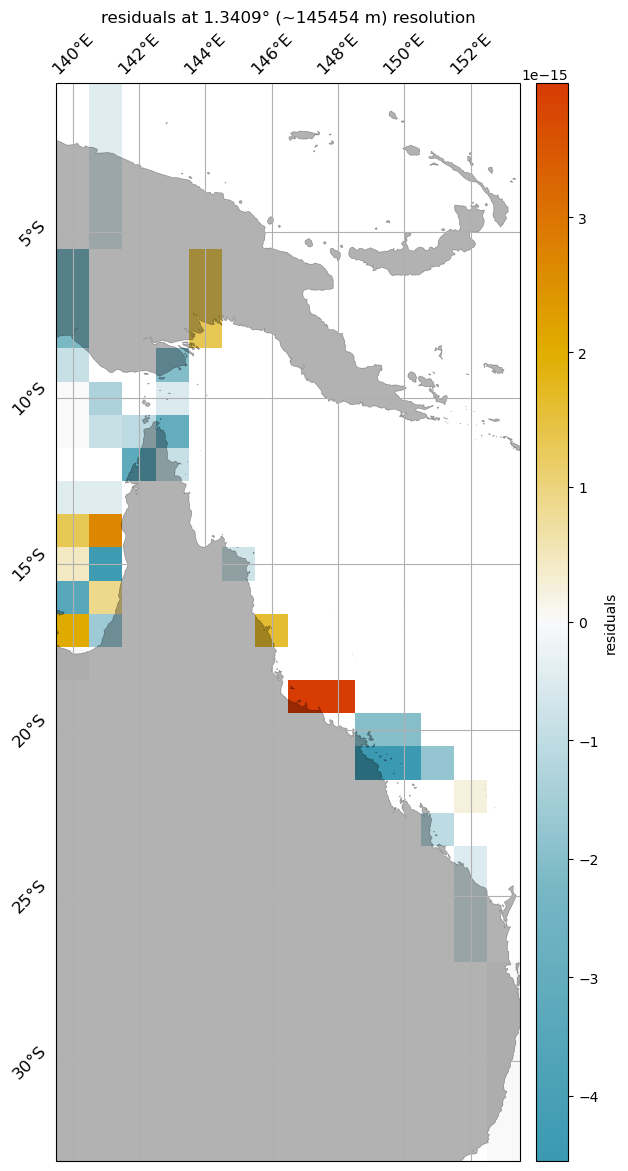

[CV 3/3; 91/100] START bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1600
[CV 3/3; 86/100] START bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200


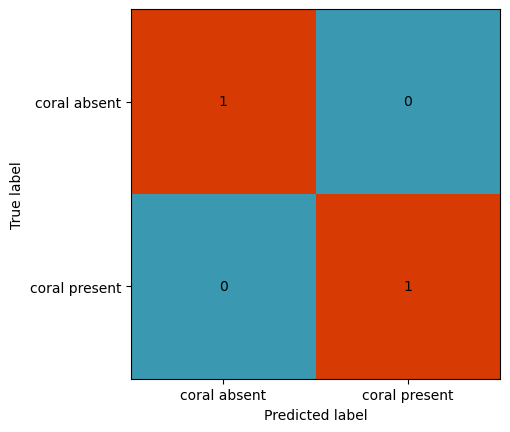

2024-06-08 15:56:17,967 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.9min


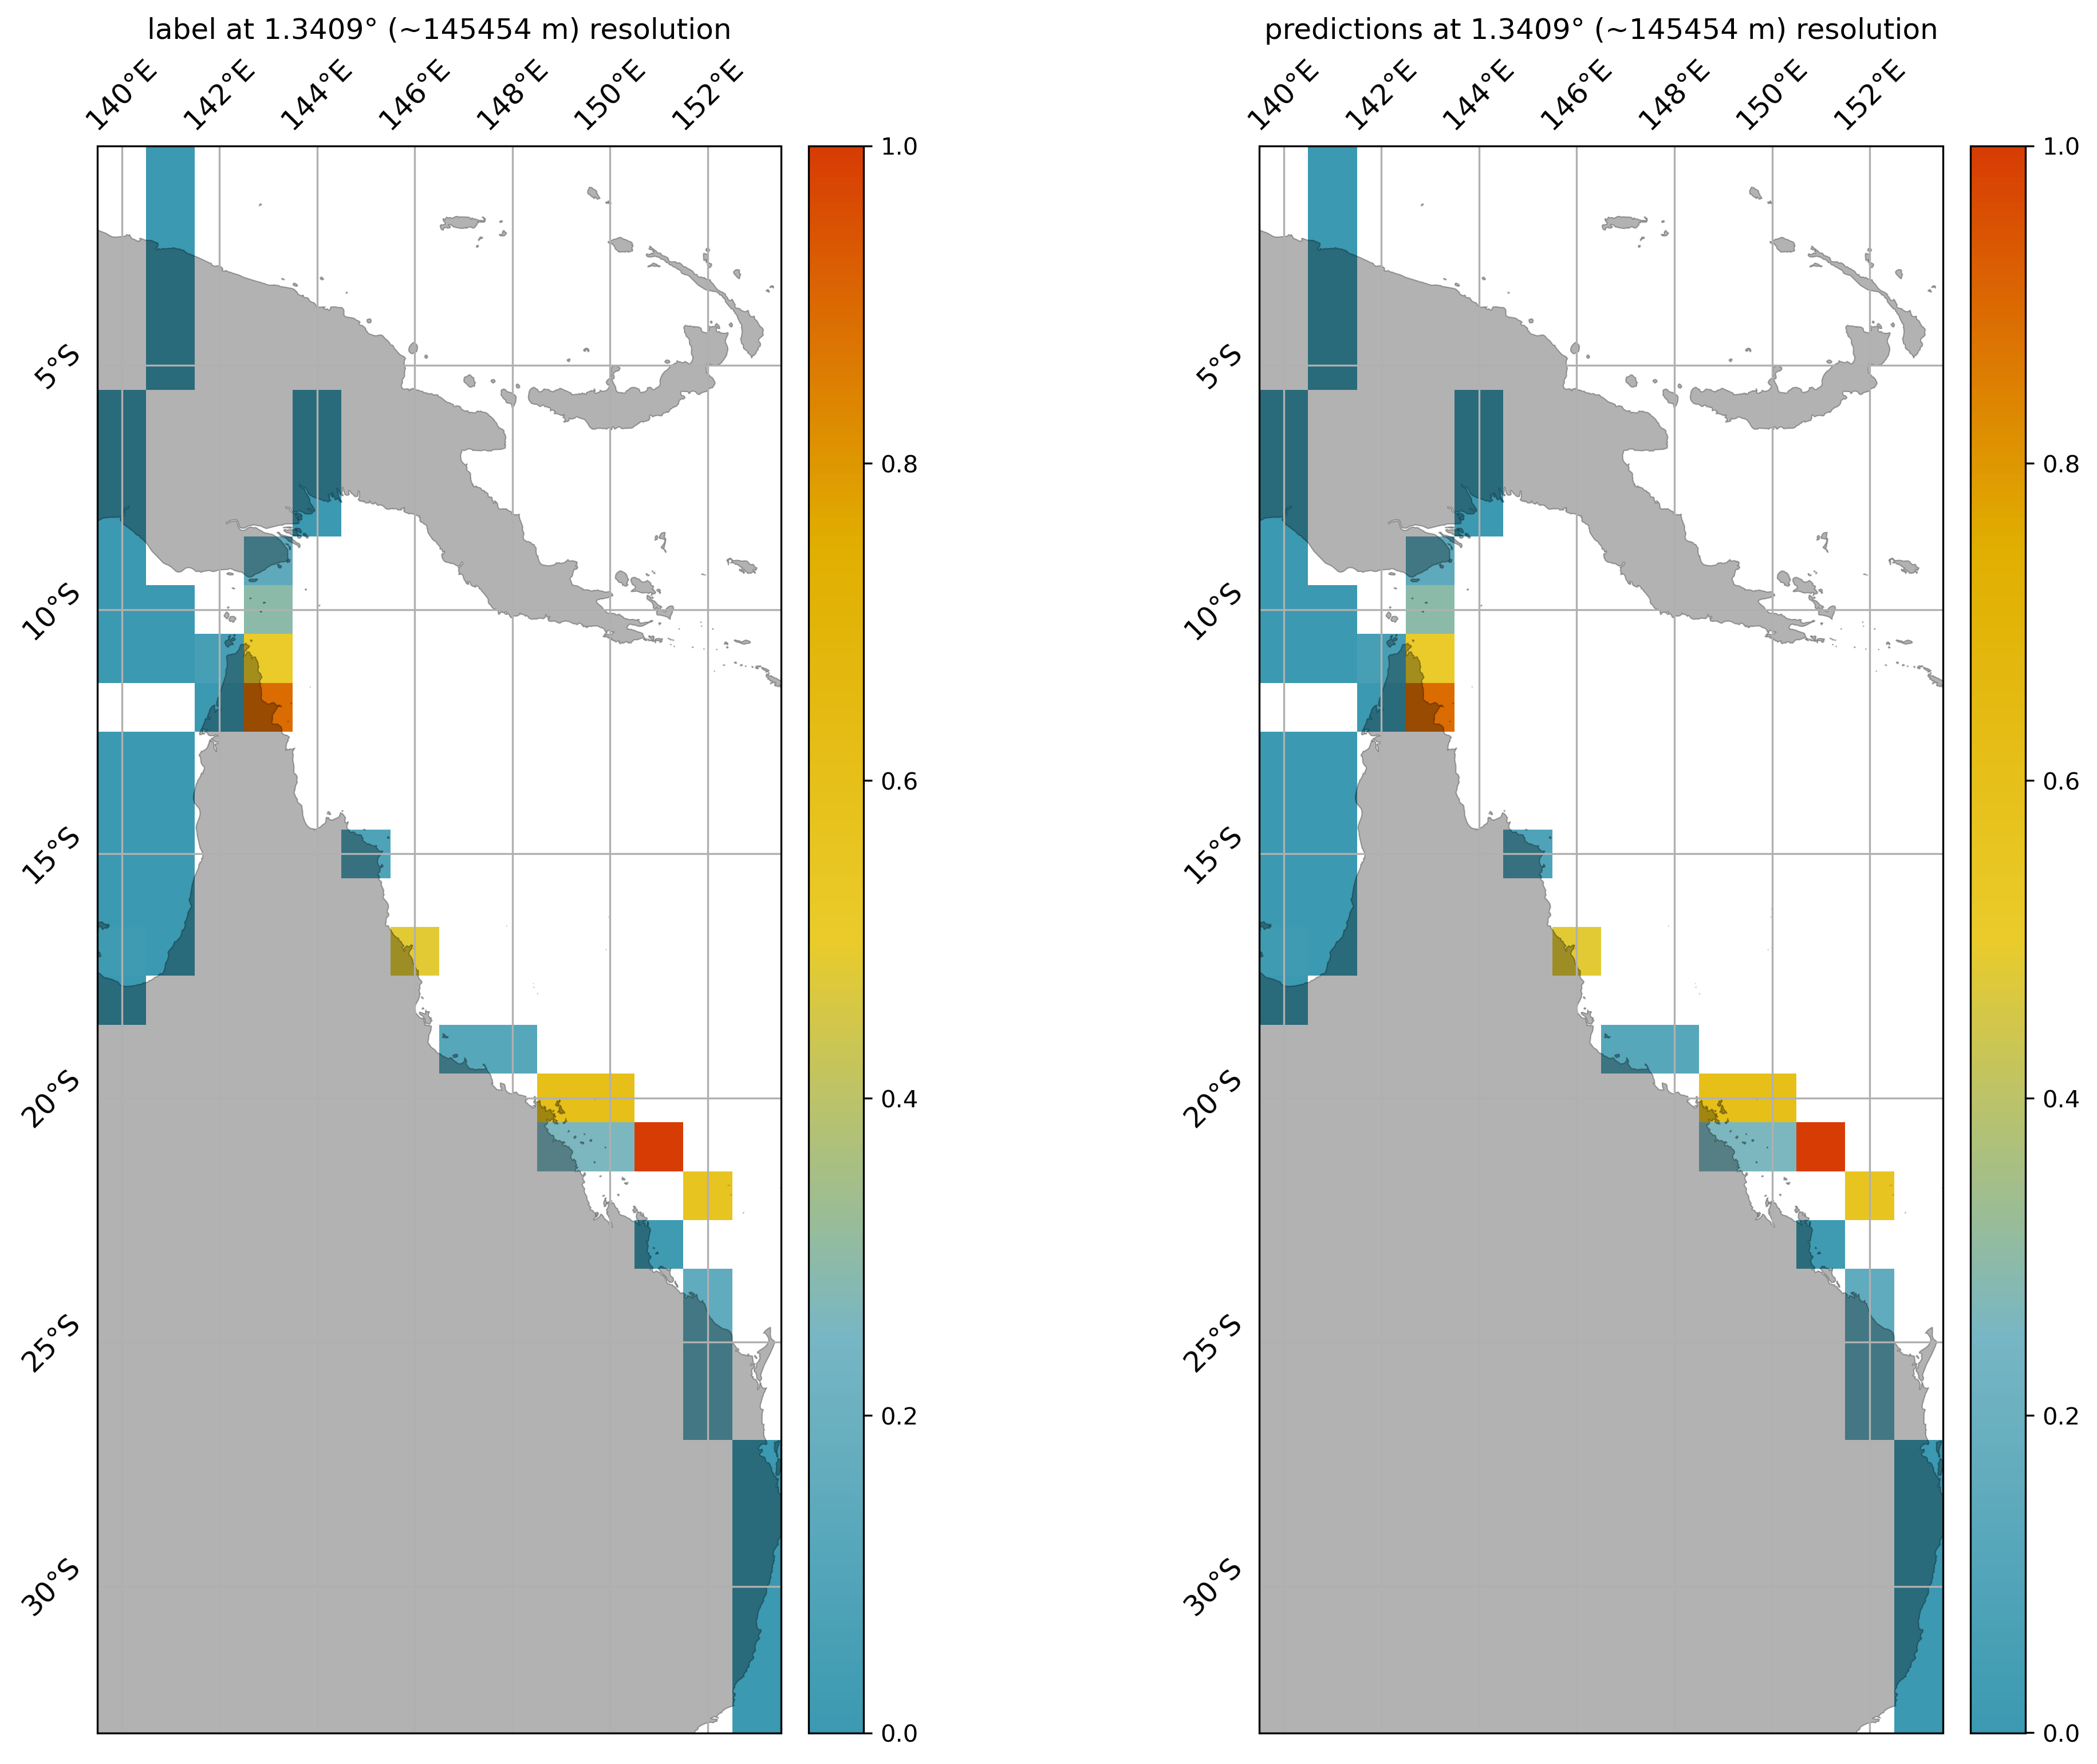

[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  3.8min finished
[Parallel(n_jobs=8)]: Done 416 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.2min finished


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.


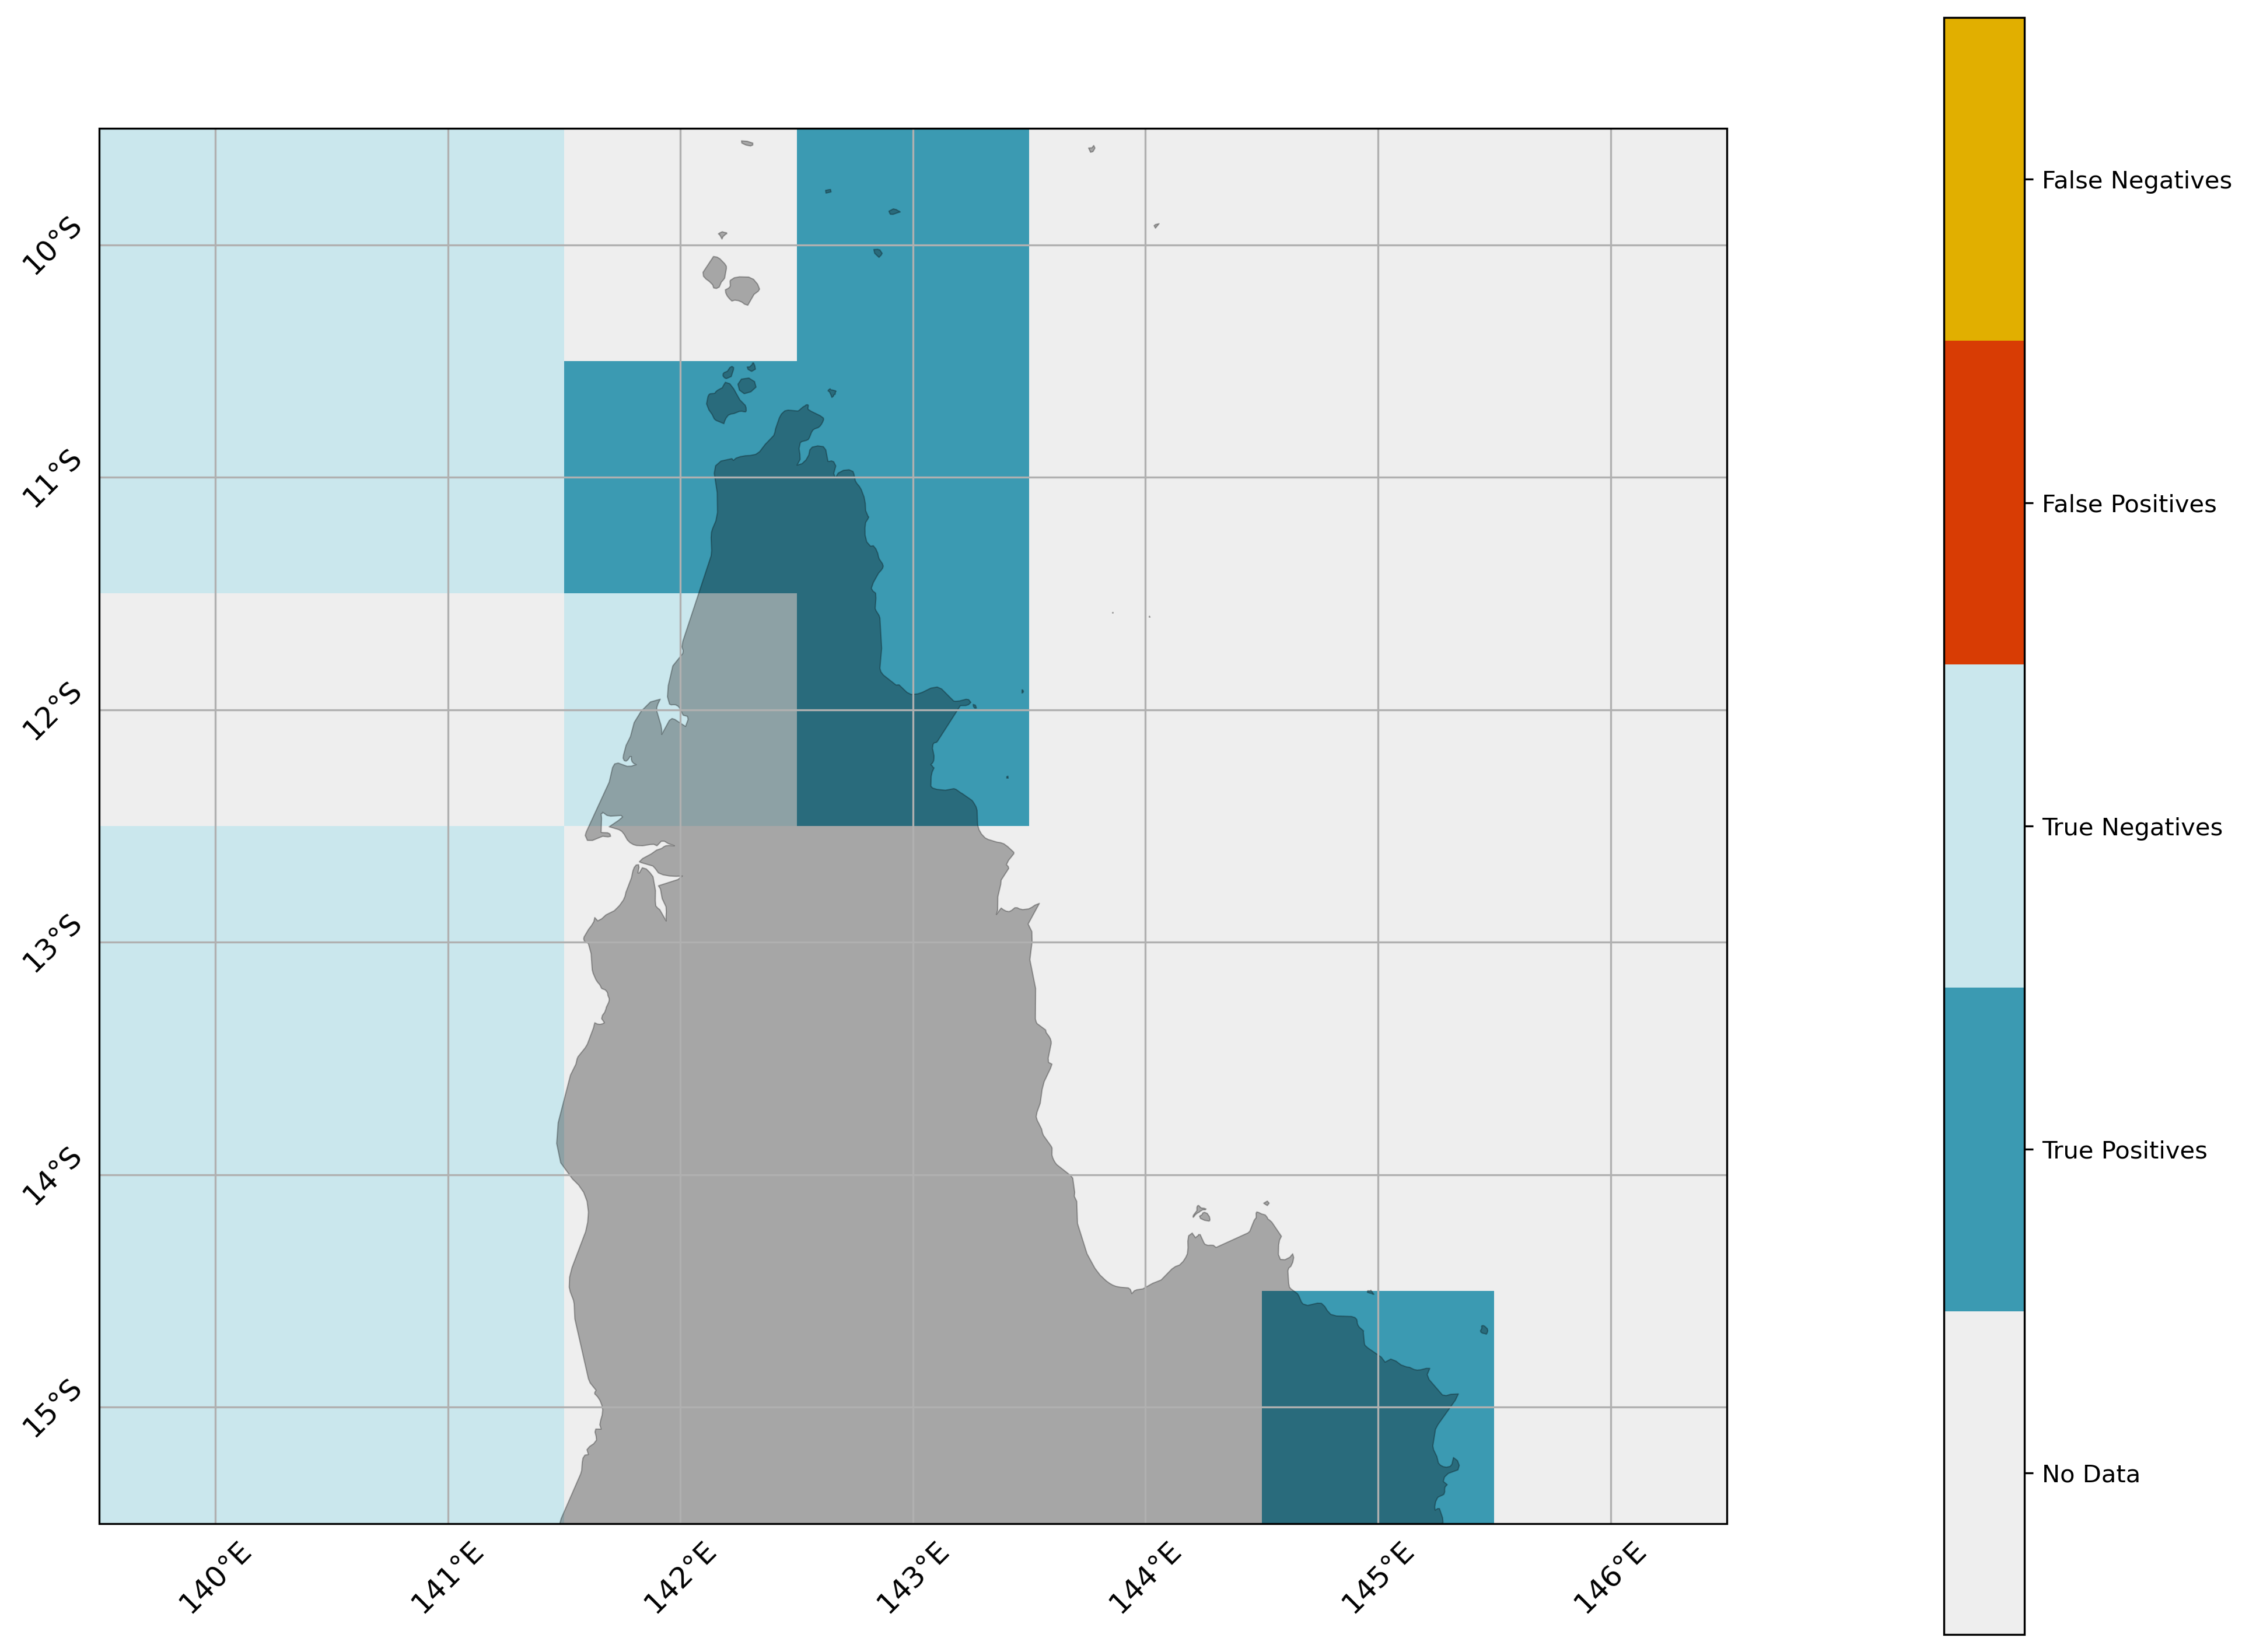

[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.1min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.2min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    1.2s finished


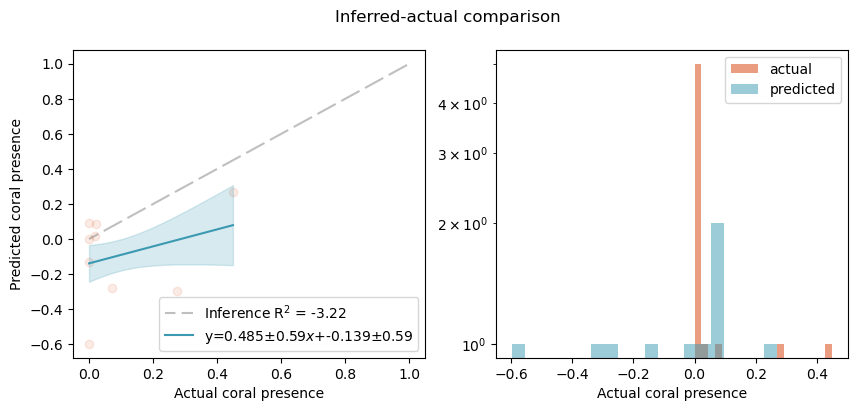

[CV 1/3; 8/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.373 total time= 4.4min
[CV 3/3; 54/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.239 total time= 3.9min


[Parallel(n_jobs=128)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.1min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s


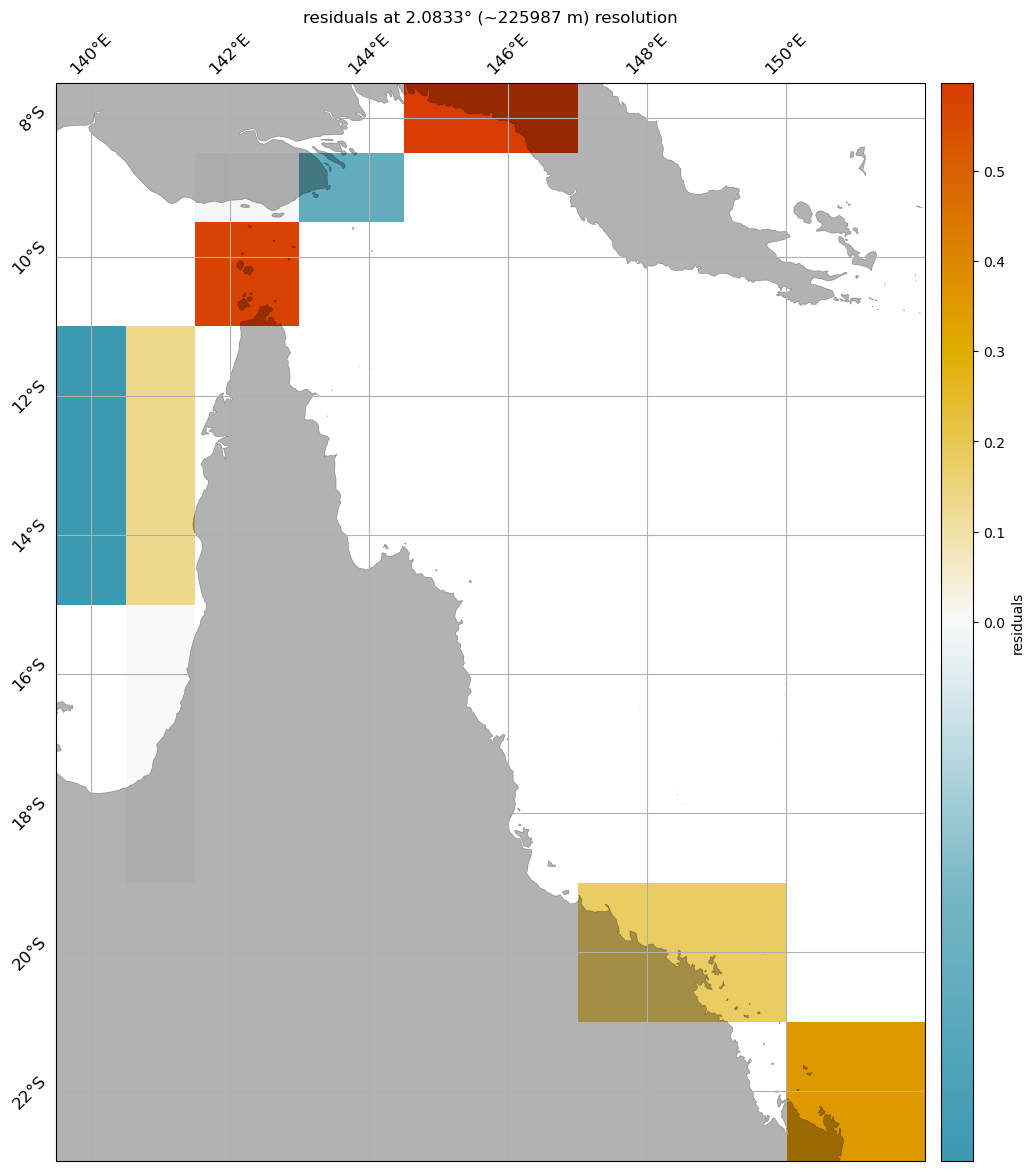

2024-06-08 15:56:21,588 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7f7cccfe3a70>>, <Task finished name='Task-407425' coro=<DaskDistributedBackend.apply_async.<locals>.f() done, defined at /maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/joblib/_dask.py:332> exception=KeyError('tcp://127.0.0.1:44291')>)
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/tornado/ioloop.py", line 774, in _discard_future_result
    future.result()
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/joblib/_dask.py", line 333, in f
    batch, tasks = await self._to_func_args(func)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

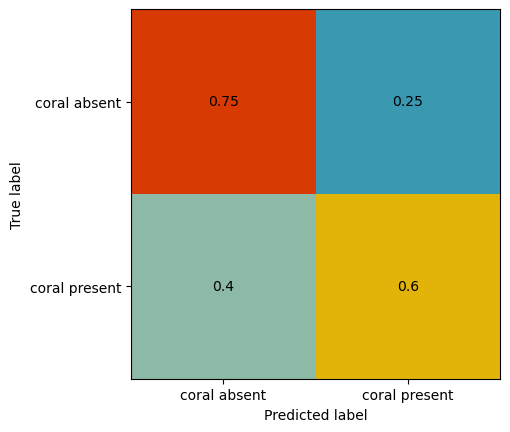

2024-06-08 15:56:21,639 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7f7cccfe3a70>>, <Task finished name='Task-407521' coro=<DaskDistributedBackend.apply_async.<locals>.f() done, defined at /maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/joblib/_dask.py:332> exception=KeyError('tcp://127.0.0.1:44291')>)
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/tornado/ioloop.py", line 774, in _discard_future_result
    future.result()
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/joblib/_dask.py", line 333, in f
    batch, tasks = await self._to_func_args(func)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 2/3; 99/100] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=-0.925 total time= 4.5min


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
2024-06-08 15:56:22,054 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:22,058 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", l

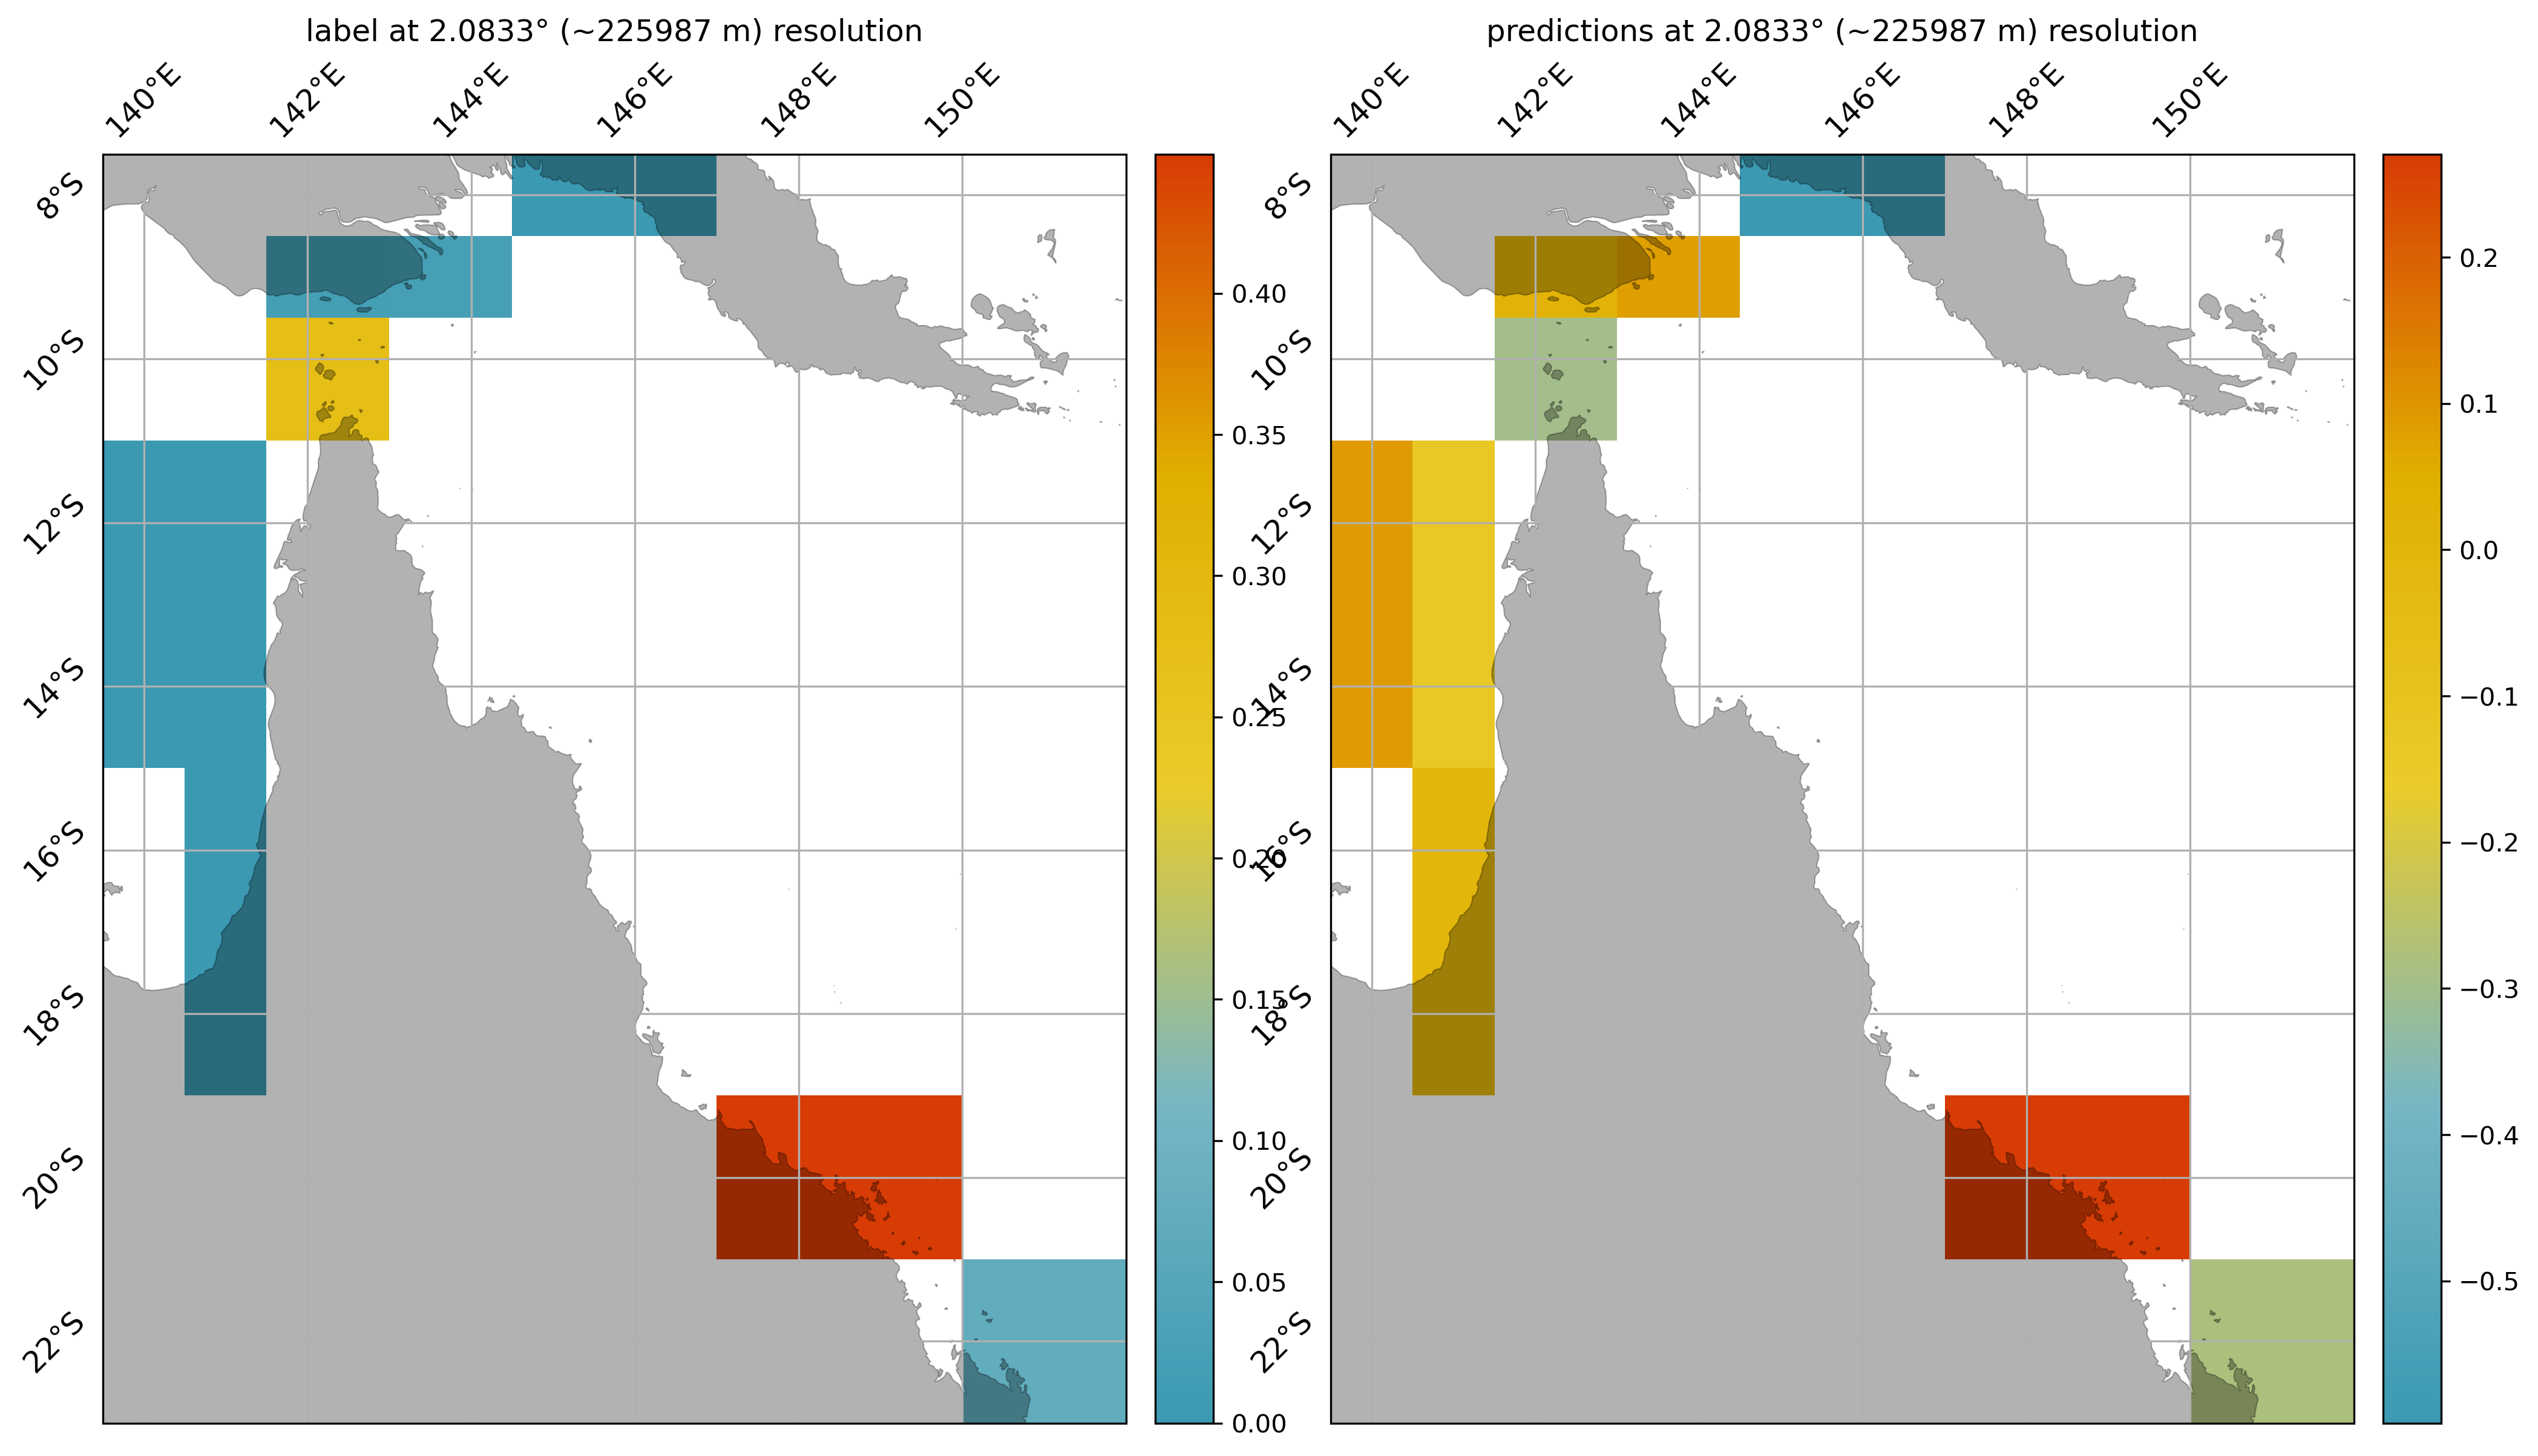

2024-06-08 15:56:23,529 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:23,535 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

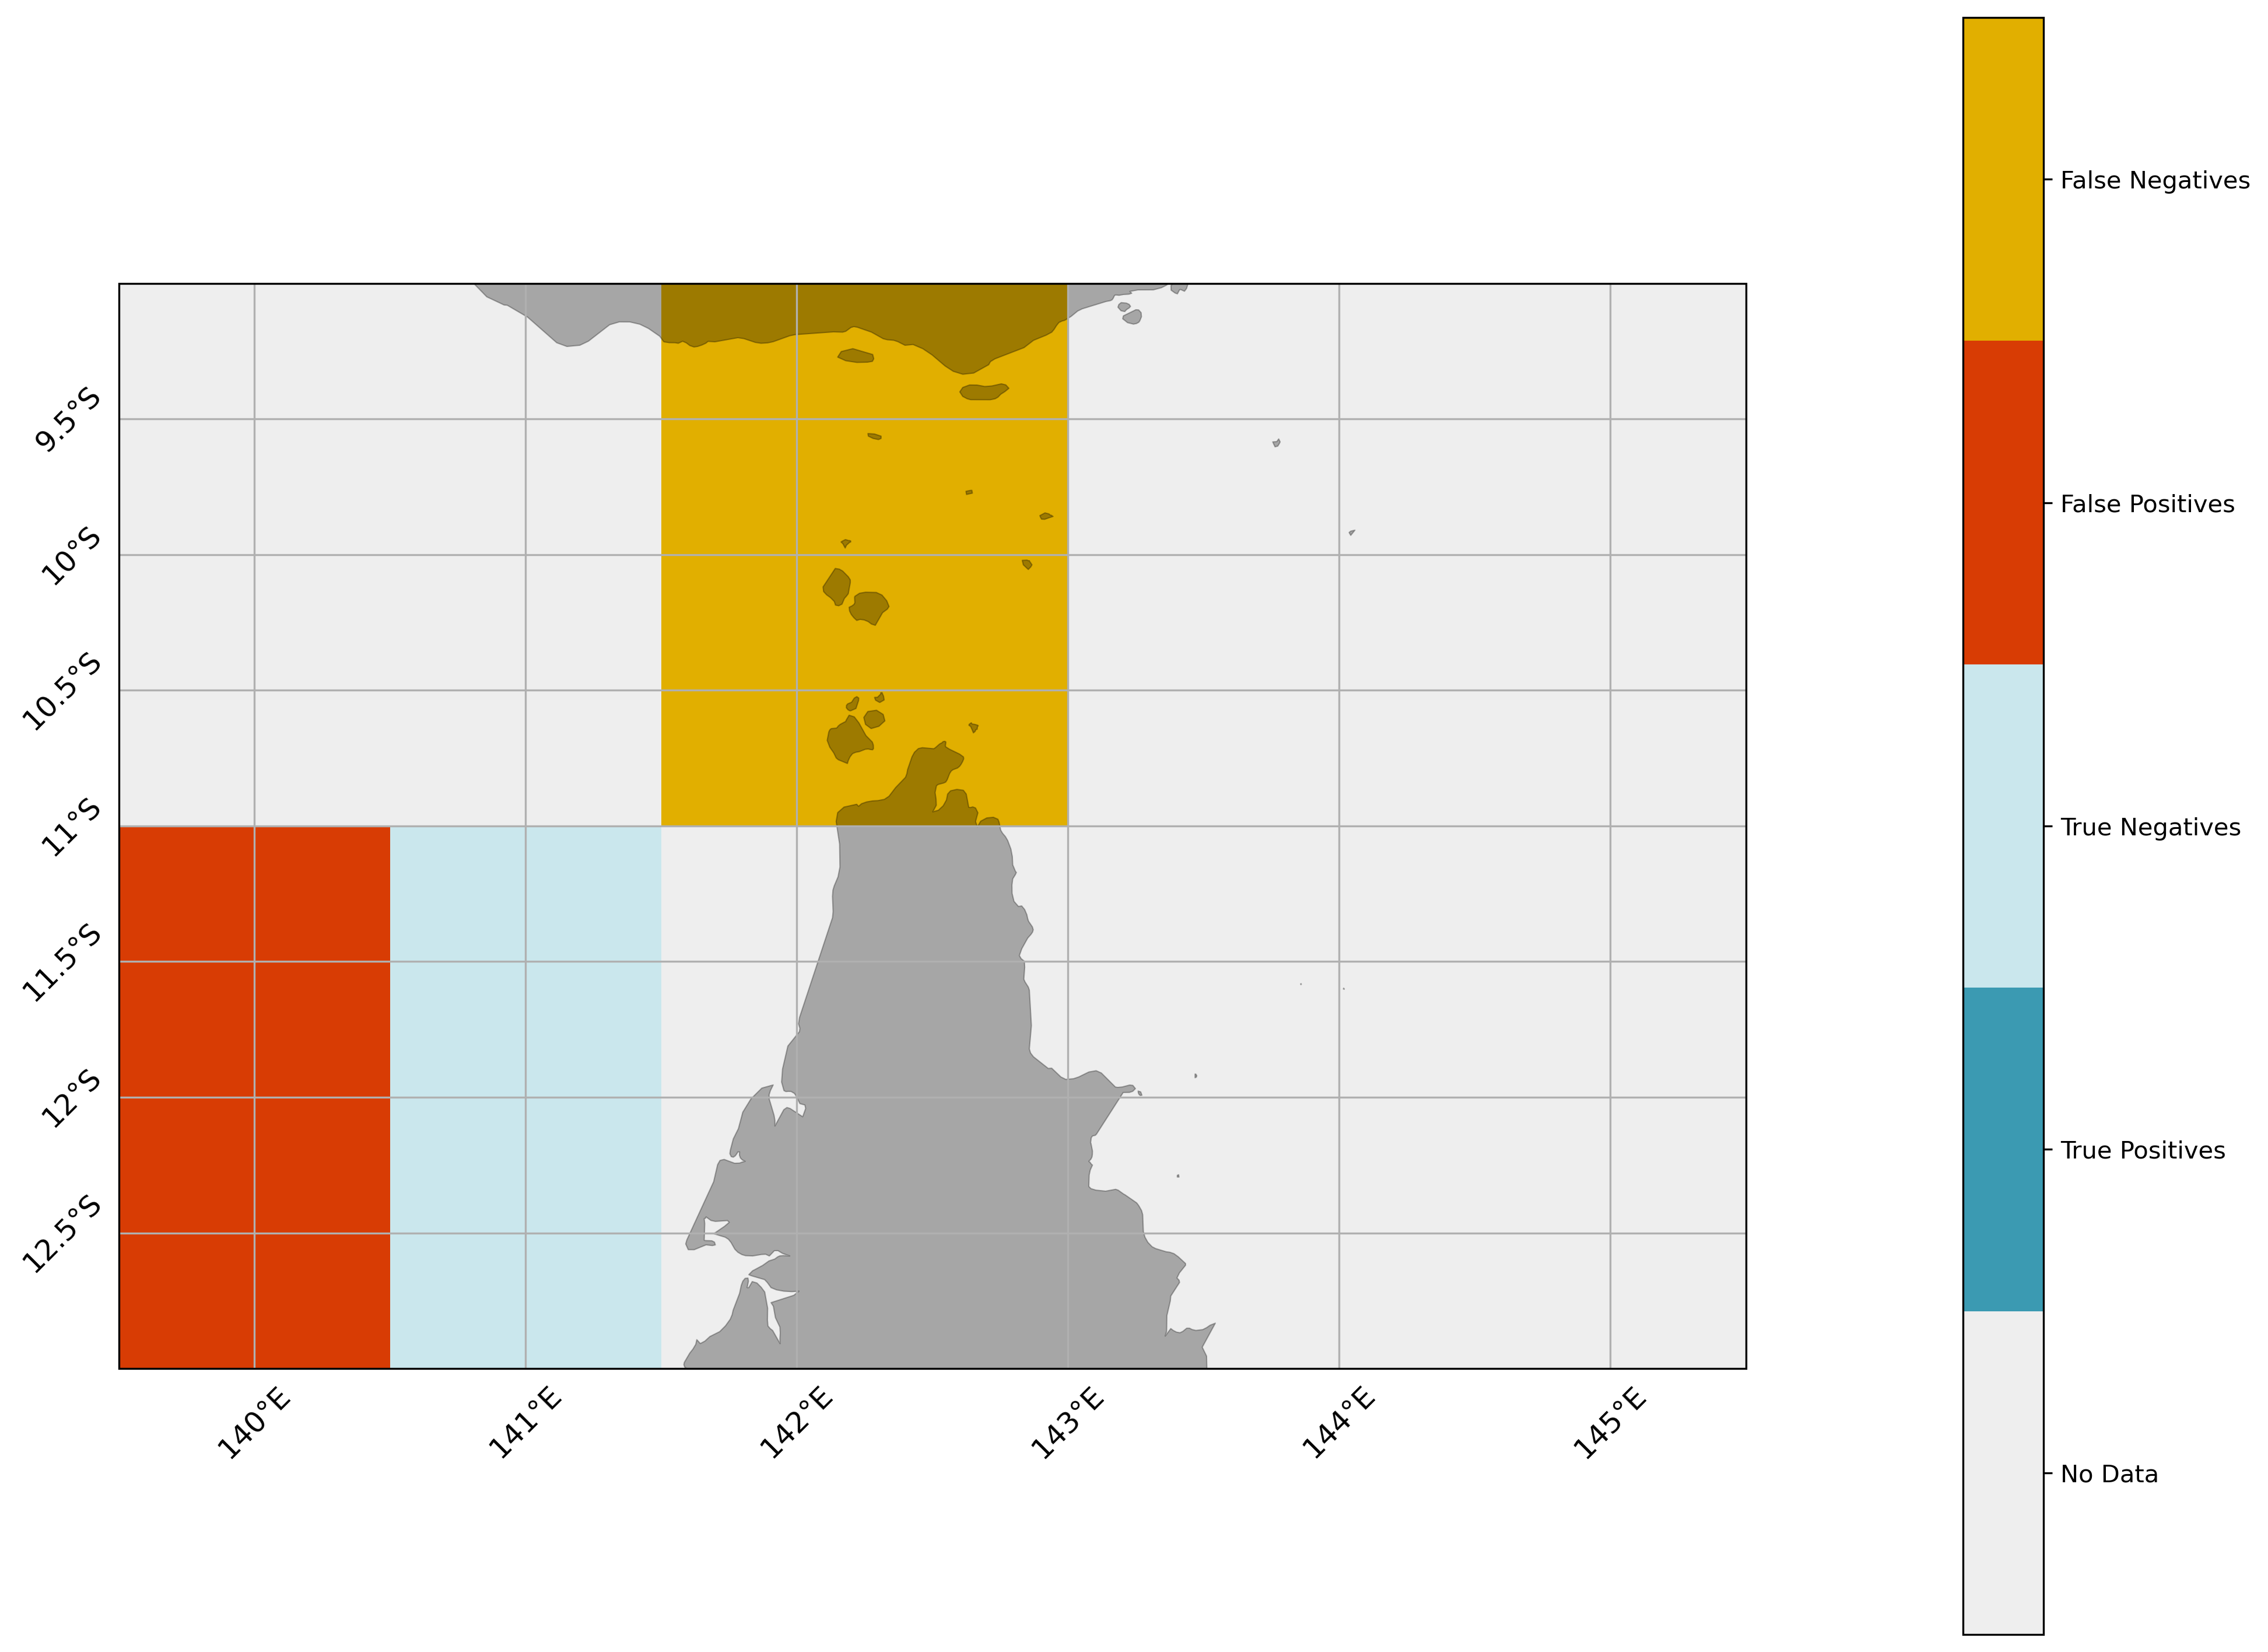

2024-06-08 15:56:24,682 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:24,695 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

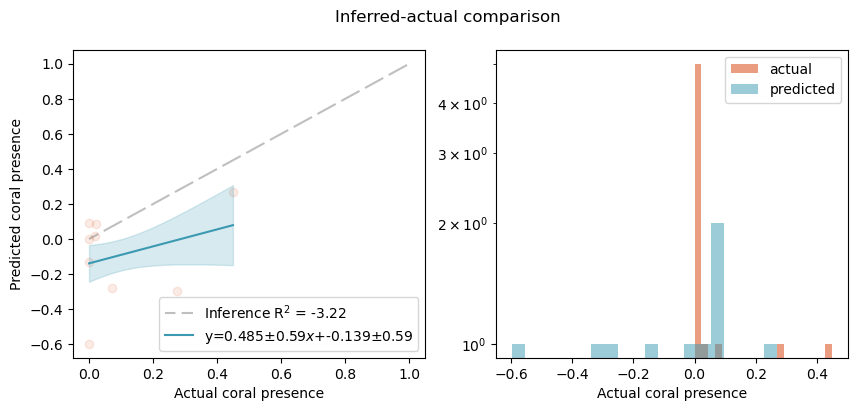

2024-06-08 15:56:25,248 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:25,259 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

[CV 1/3; 4/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.804 total time= 4.5min


2024-06-08 15:56:25,971 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:25,981 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

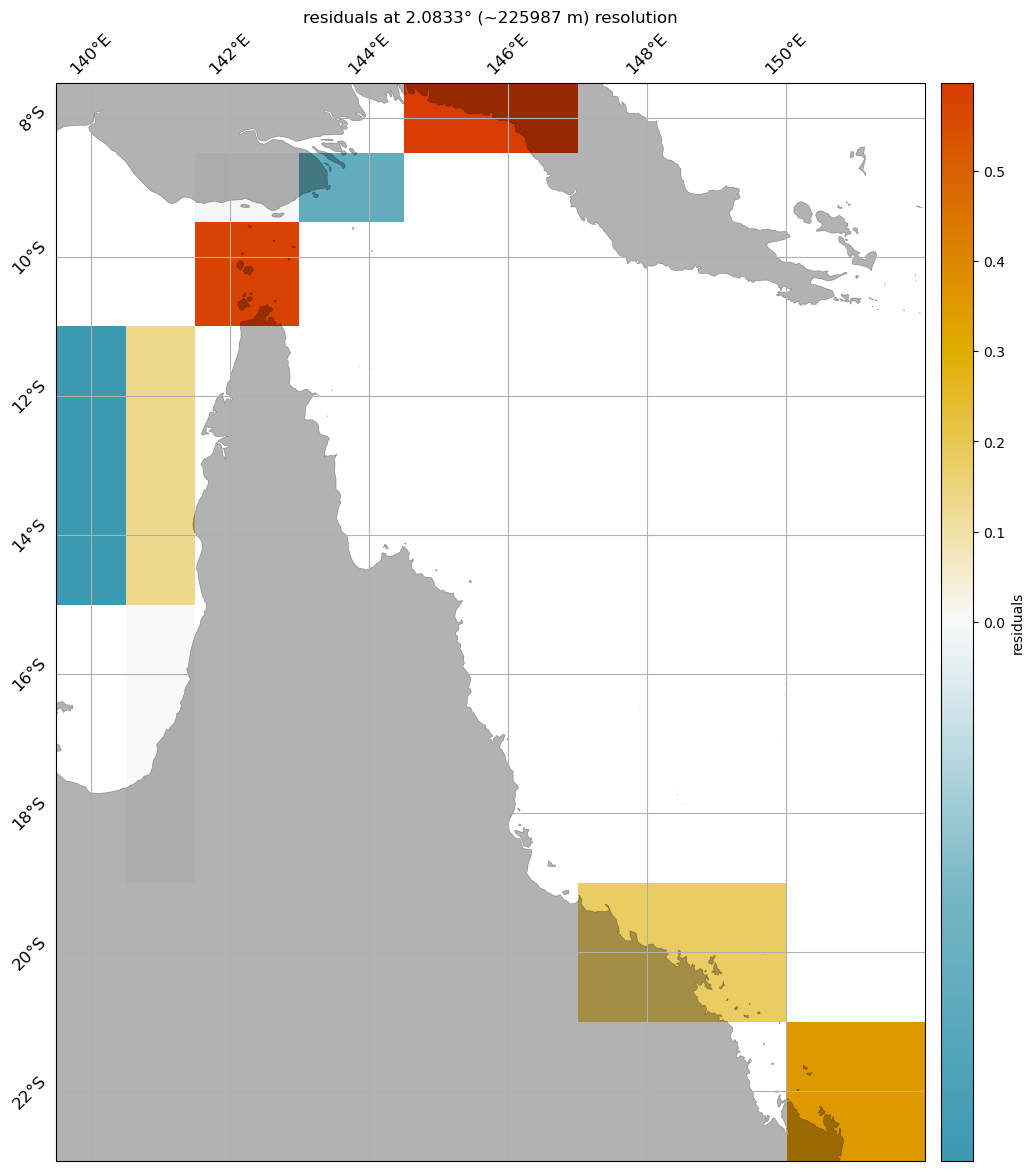

2024-06-08 15:56:26,139 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:26,141 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

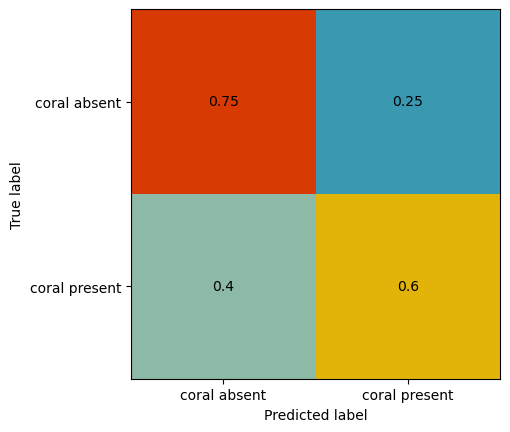

2024-06-08 15:56:26,239 - distributed.scheduler - ERROR - 'tcp://127.0.0.1:44291'
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/scheduler.py", line 7512, in update_data
    ws = self.workers[w]
         ~~~~~~~~~~~~^^^
KeyError: 'tcp://127.0.0.1:44291'
2024-06-08 15:56:26,248 - distributed.core - ERROR - Exception while handling op update_data
Traceback (most recent call last):
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/core.py", line 968, in _handle_comm
    result = handler(**msg)
             ^^^^^^^^^^^^^^
  File "/maps/rt582/miniforge3/envs/shiftpy/lib/python3.12/site-packages/distributed/utils.py", line 838, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  

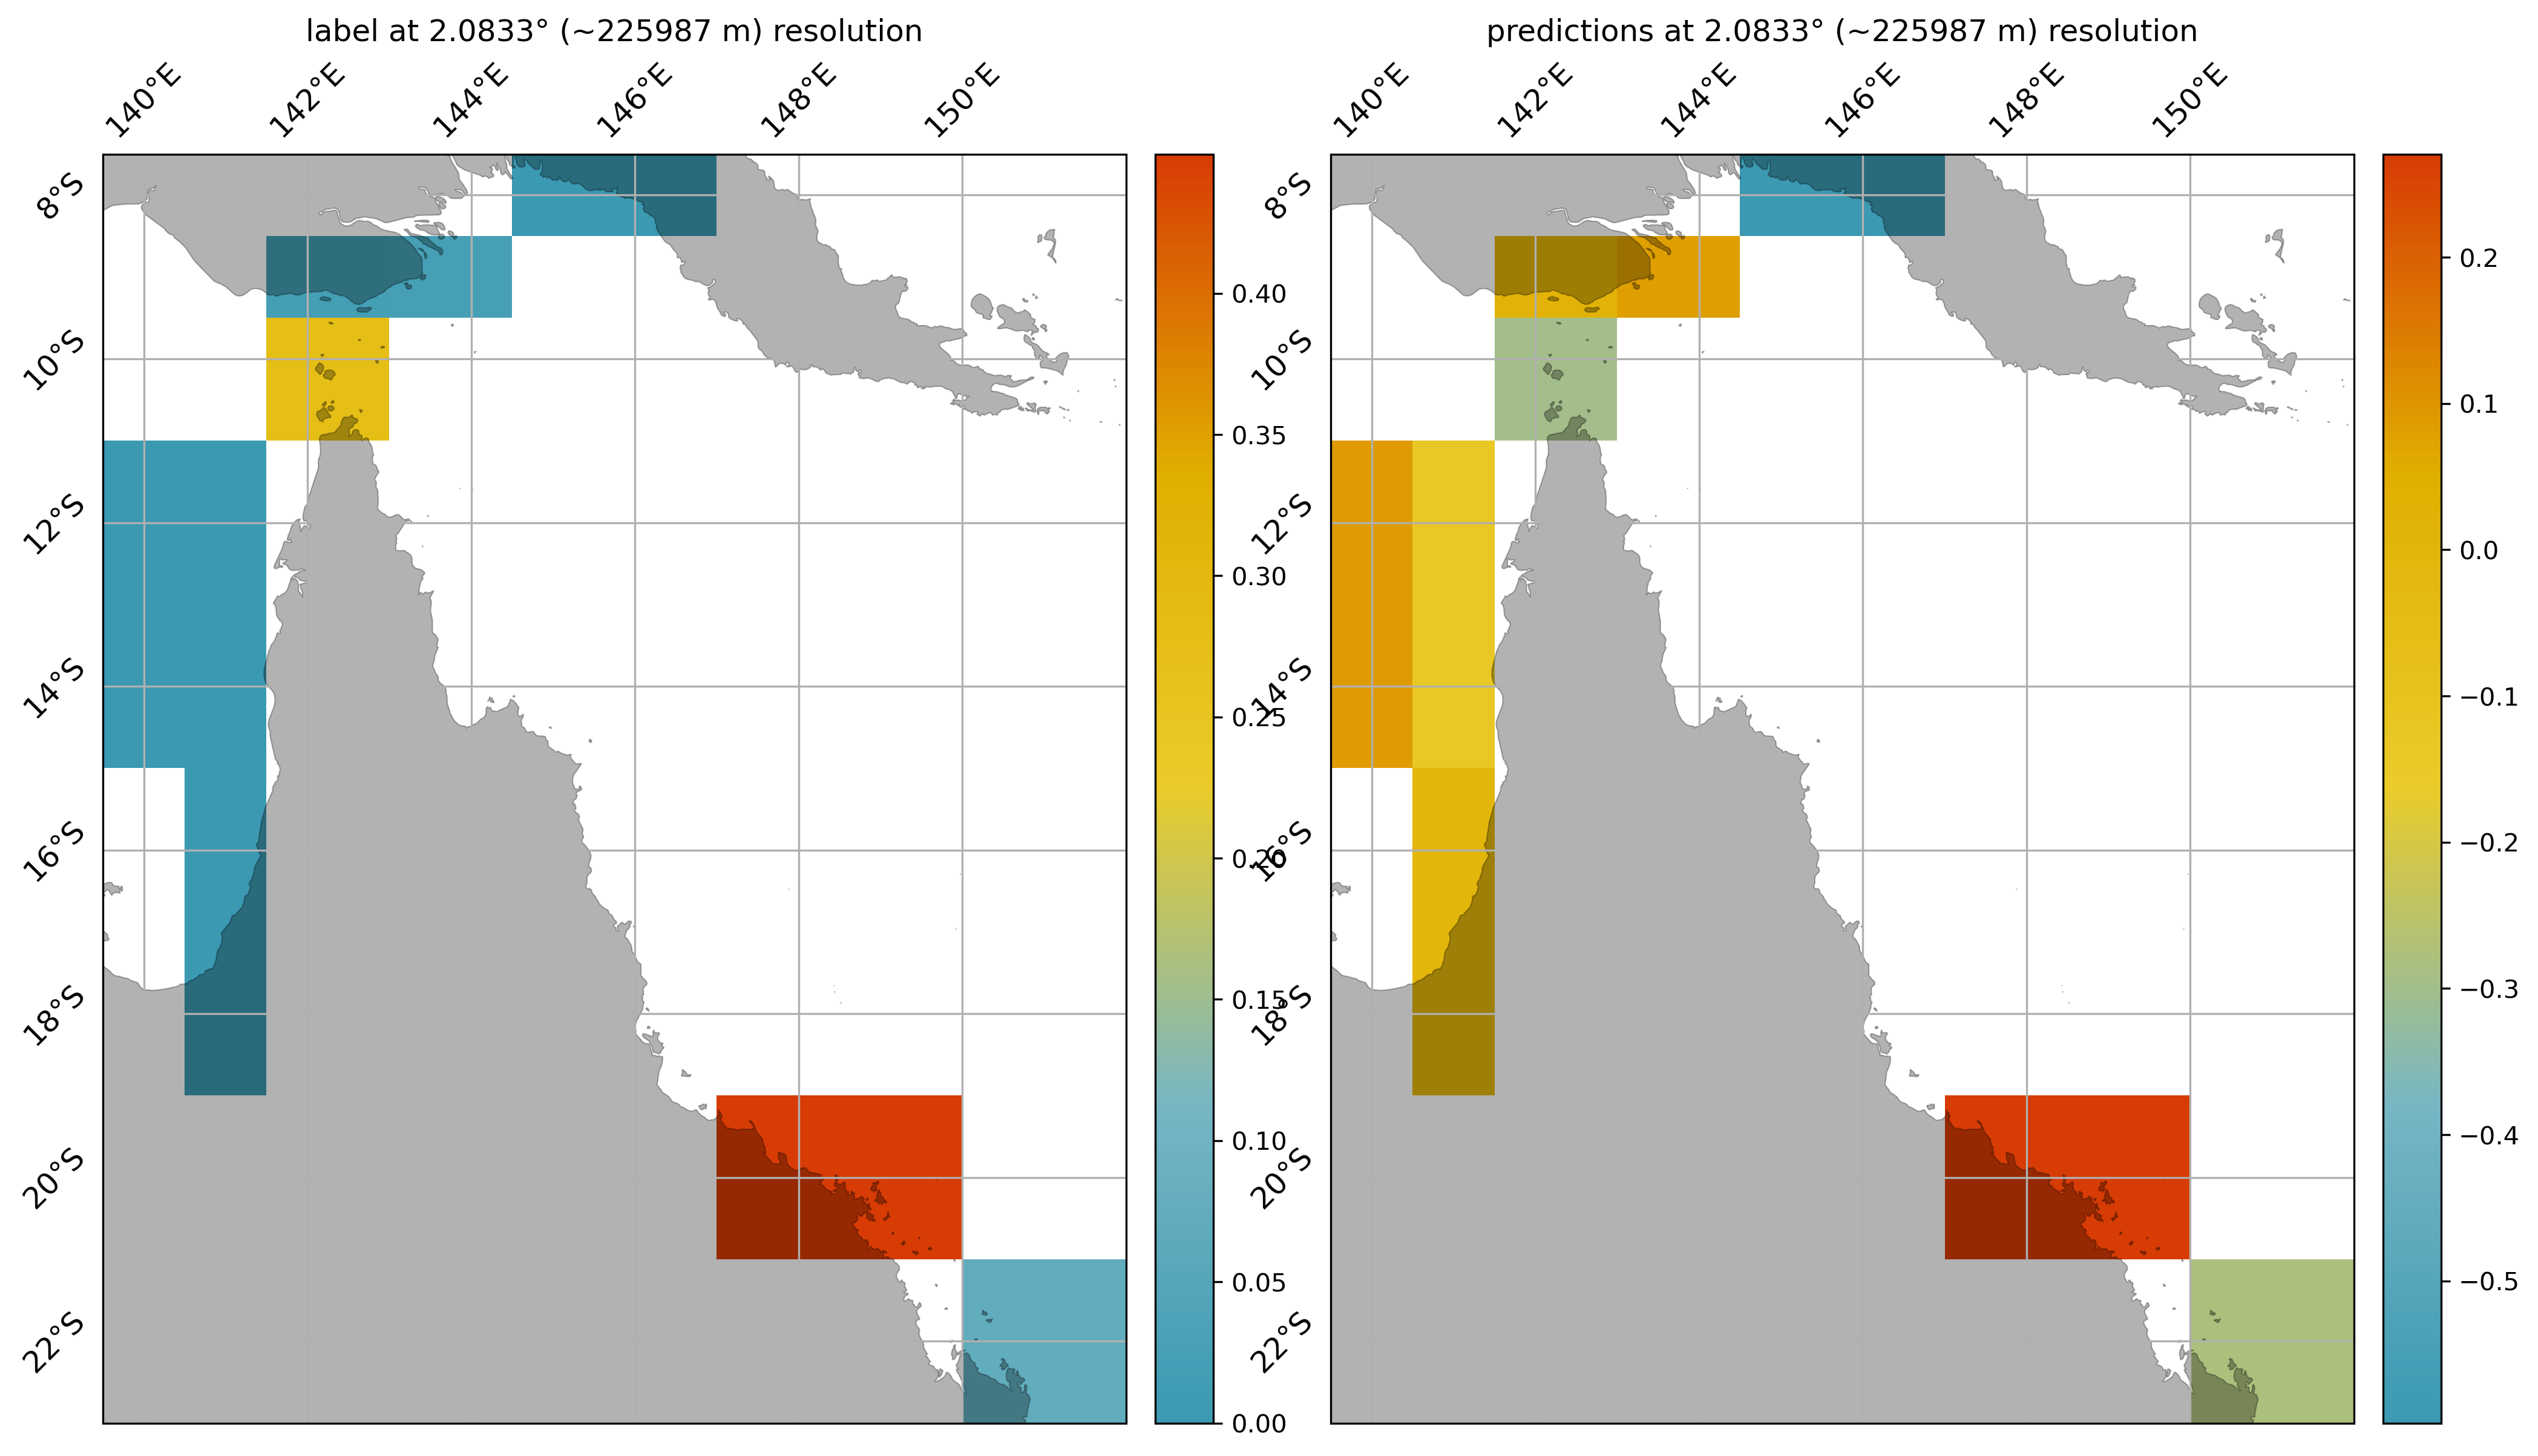

[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    0.7s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    0.9s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    0.9s
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    1.0s finished


[CV 2/3; 63/100] END bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-1.246 total time= 4.6min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    0.7s


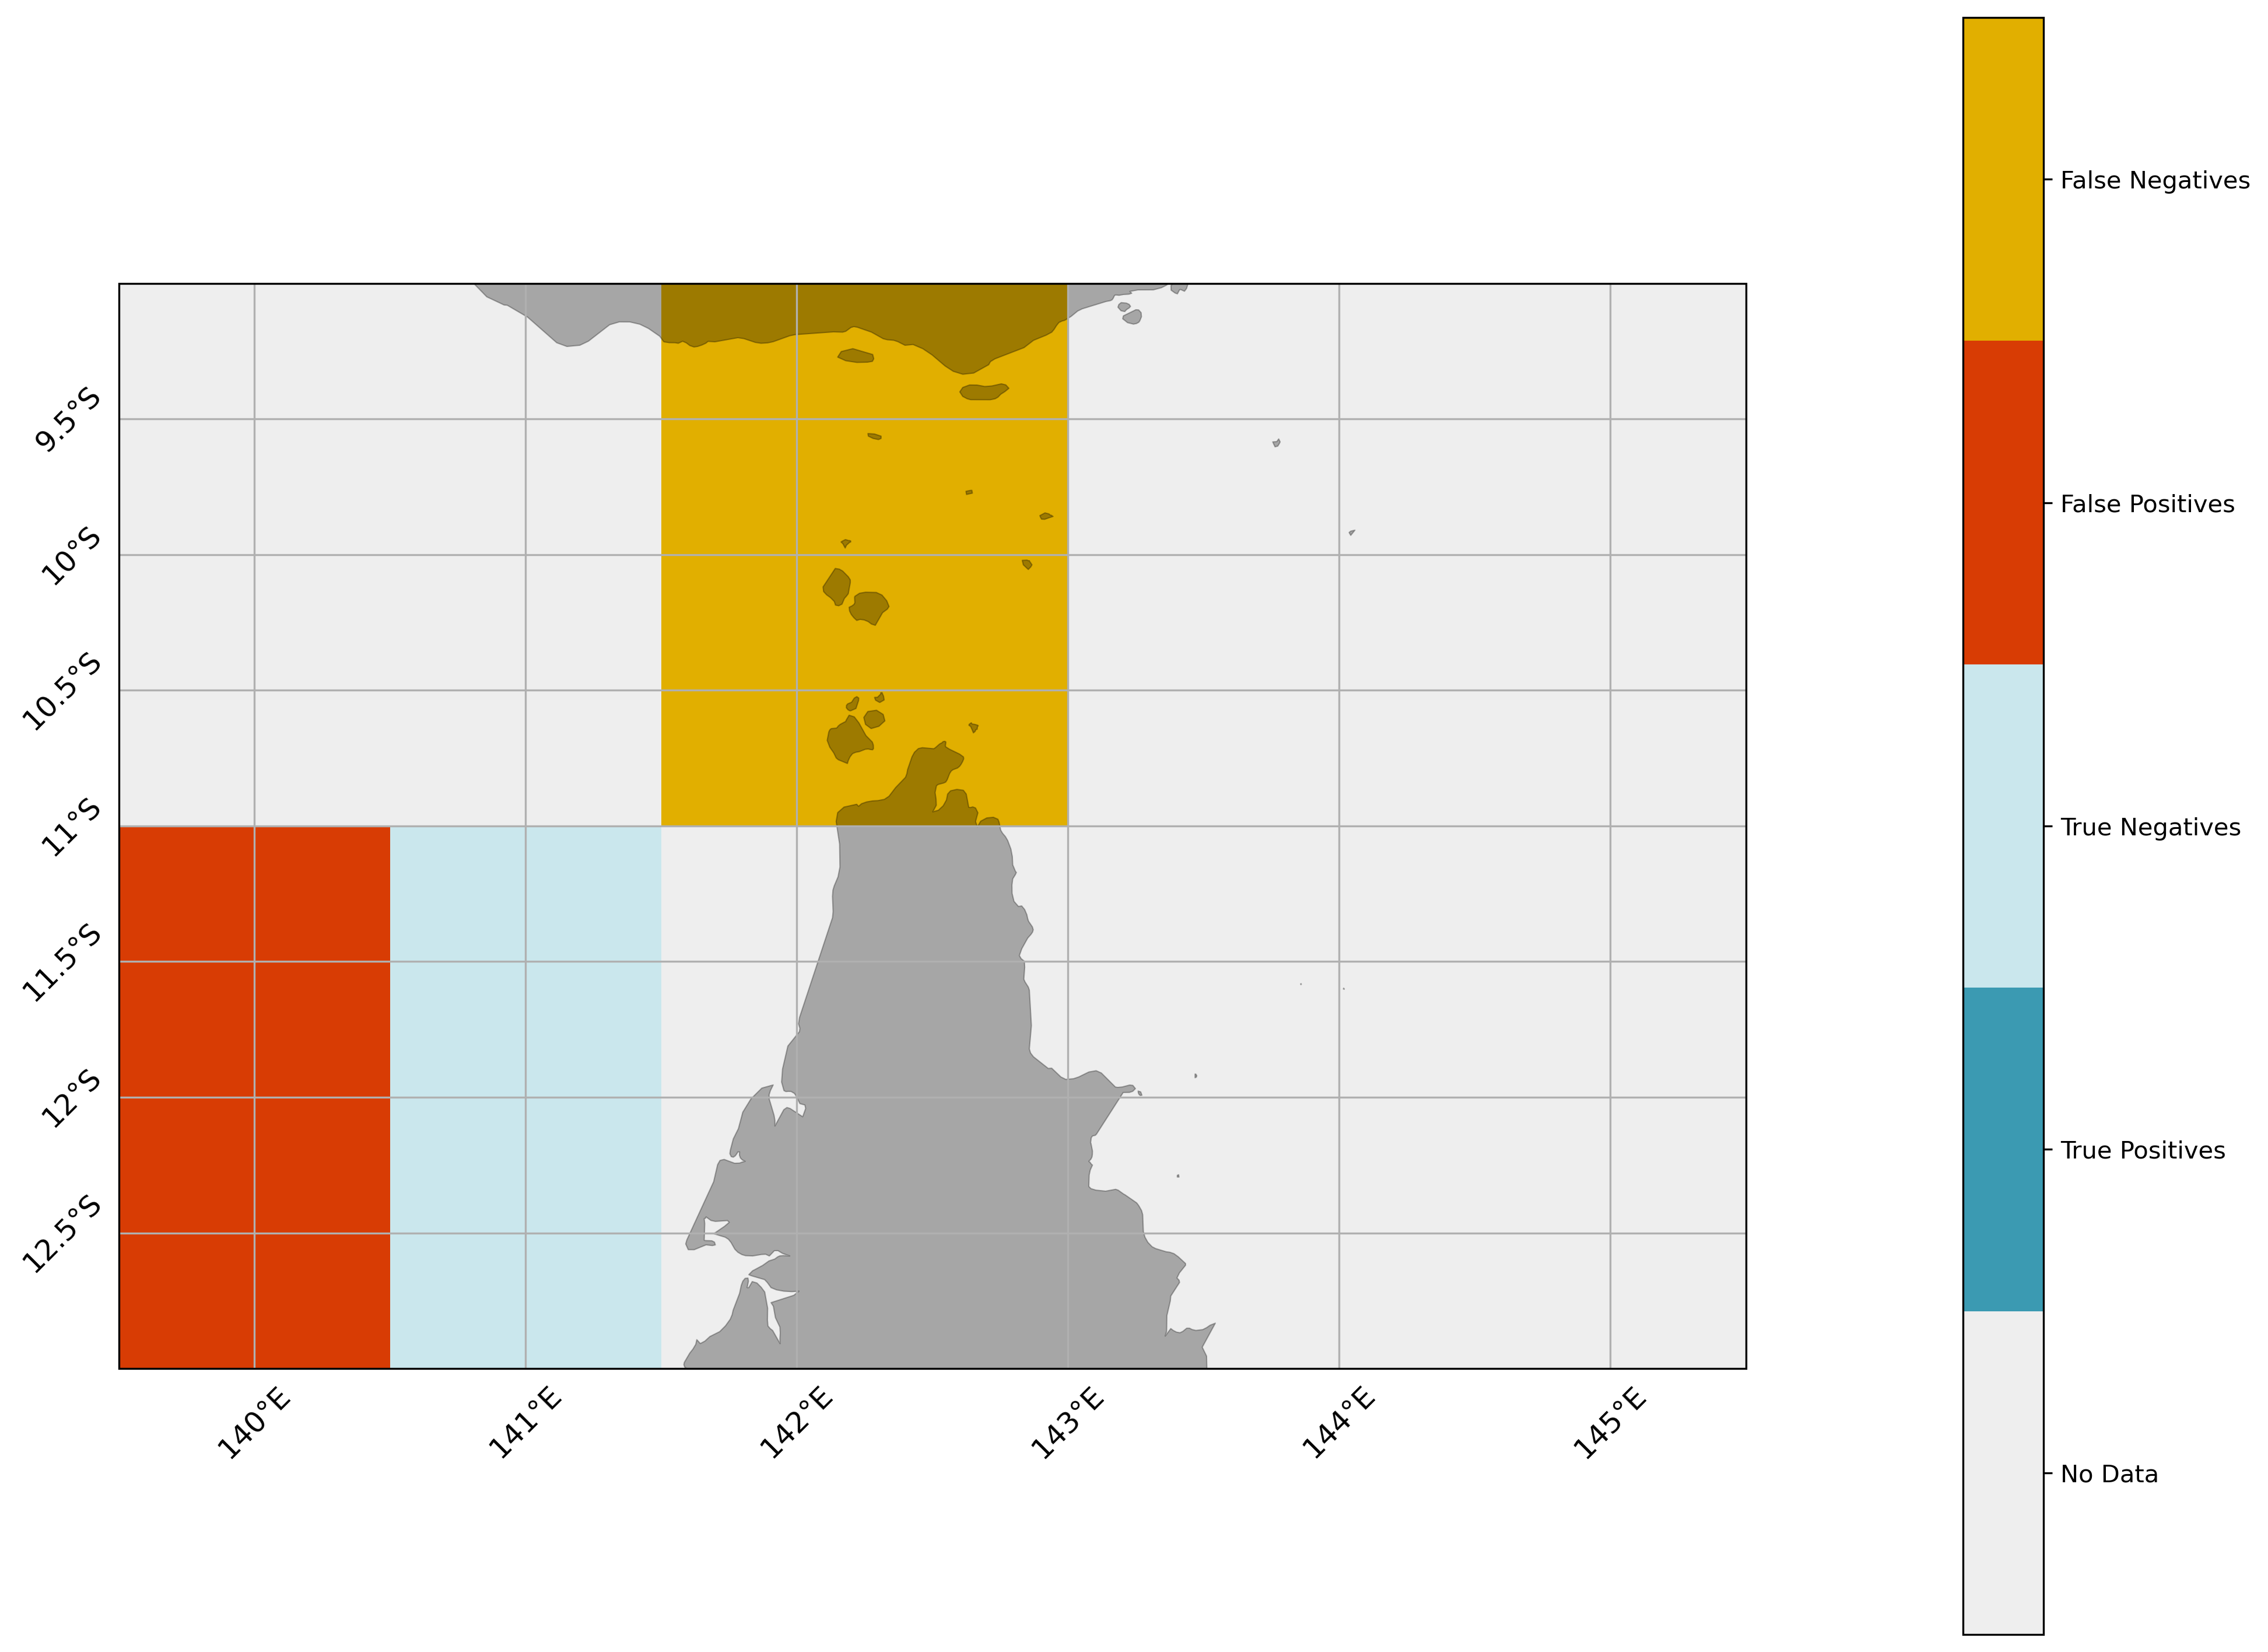

[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.1min
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.9s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.1min


[CV 1/3; 82/100] END bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.693 total time= 4.6min


[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.3min finished


[CV 1/3; 18/100] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.072 total time= 4.6min


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.


[CV 3/3; 79/100] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=nan total time= 5.9min
[CV 1/3; 99/100] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=nan total time= 5.5min
[CV 1/3; 37/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=nan total time= 6.9min[CV 1/3; 93/100] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=nan total time= 5.7min
[CV 1/3; 55/100] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=nan total time= 6.5min
[CV 1/3; 85/100] END bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=nan total time= 5.8min

[CV 1/3; 77/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=nan total time= 6.0min
[CV 3/3; 8

[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.2min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.


[CV 3/3; 3/100] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=nan total time= 7.3min[CV 3/3; 25/100] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=nan total time= 7.2min
[CV 3/3; 85/100] END bootstrap=True, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=nan total time= 5.8min[CV 3/3; 69/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=nan total time= 6.1min[CV 2/3; 32/100] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=nan total time= 7.0min
[CV 2/3; 72/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=nan total time= 6.1min



[CV 2/3; 78/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=nan total time= 6.0min[CV 2/3

[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s


[CV 1/3; 23/100] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800;, score=nan total time= 7.4min
[CV 1/3; 11/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=nan total time= 7.3min
[CV 2/3; 98/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=nan total time= 5.6min
[CV 3/3; 43/100] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=nan total time= 6.8min
[CV 1/3; 65/100] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400;, score=nan total time= 6.3min
[CV 3/3; 5/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=nan total time= 7.3min
[CV 1/3; 83/100] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=nan total time= 5.9min[CV 

2024-06-08 15:56:34,457 - distributed.nanny - WARNING - Worker process still alive after 4.0 seconds, killing
2024-06-08 15:56:35,467 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    3.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.2s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    3.3s finished


[CV 3/3; 18/100] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.447 total time= 4.7min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    1.4s finished


[CV 3/3; 78/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.205 total time= 4.7min


[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    5.7s finished


[CV 3/3; 8/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.346 total time= 4.7min


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    2.2s finished


[CV 2/3; 47/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-0.681 total time= 4.8min


[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.6min finished
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskD

[CV 2/3; 33/100] END bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=1000;, score=-0.940 total time= 4.9min


[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using backend DaskDistributedBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Using back

[CV 1/3; 10/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.560 total time= 5.0min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.5min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    1.5s finished


[CV 3/3; 4/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.311 total time= 5.0min


[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    2.6s finished


[CV 3/3; 82/100] END bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.202 total time= 5.0min


[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
2024-06-08 15:56:58,331 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.6min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.7s
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    2.7s finished


[CV 2/3; 37/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.932 total time= 5.1min


[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   42.8s remaining:   15.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   43.0s finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.7min
[Parallel(n_jobs=128)]: Done 146 out of 200 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=128)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   41.5s remaining:   15.4s


[CV 2/3; 67/100] END bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.913 total time=  47.3s


[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   41.8s finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   46.3s remaining:   17.1s
[Parallel(n_jobs=128)]: Done 146 out of 200 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=128)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   47.0s finished


[CV 1/3; 75/100] END bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.364 total time=  49.8s


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   46.1s remaining:   17.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   46.3s finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 146 out of 200 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=128)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=128)]: Done 146 out of 200 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=128)]: Done 200 out of 200 | elapsed:    1.3s finished


[CV 1/3; 42/100] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.676 total time=  51.3s
[CV 3/3; 86/100] END bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.238 total time=  50.0s


[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   22.8s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   41.3s remaining:   15.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   41.3s finished
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   42.4s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   40.5s
2024-06-08 15:57:10,626 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 146 out of 200 | elapsed:    2.3s remaining:    0.9s
[Parallel(n_jobs=128)]: Done 200 out of 200 | elapsed:    2.3s finished


[CV 1/3; 79/100] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.557 total time=  54.5s


[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   42.1s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   36.3s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   51.1s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   41.9s
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   46.0s remaining:   17.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   46.2s finished
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.9min
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 146 out of 200 | elapsed:   47.5s remaining:   17.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   47.8s finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.9min
[Parallel(n_jobs=128)]: Done 146 out of 200 

[CV 1/3; 86/100] END bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.564 total time= 1.0min
[CV 3/3; 79/100] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.172 total time= 1.1min


[Parallel(n_jobs=128)]: Done 146 out of 200 | elapsed:    2.3s remaining:    0.9s
[Parallel(n_jobs=128)]: Done 200 out of 200 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   42.0s
2024-06-08 15:57:20,584 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   39.9s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   39.8s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   42.2s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   50.1s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   58.1s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   51.9s
[Parallel(n_jobs=8)]: Done 866 tasks      | e

[CV 2/3; 86/100] END bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.890 total time= 1.4min


[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   54.3s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   55.5s
2024-06-08 15:57:41,698 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   56.6s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   57.8s
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.5min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.4min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.1

[CV 1/3; 20/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.366 total time= 5.9min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.7s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   58.4s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    1.9s finished


[CV 2/3; 71/100] END bootstrap=False, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1400;, score=-0.636 total time= 5.9min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:   59.1s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    3.1s finished


[CV 2/3; 11/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=-0.100 total time= 5.9min


[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  5.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  5.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    1.3s finished


[CV 3/3; 32/100] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=0.241 total time= 6.0min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.1min
2024-06-08 15:57:54,063 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  5.6min
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    4.7s finished


[CV 1/3; 32/100] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=0.578 total time= 6.0min


[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | e

[CV 2/3; 81/100] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=-0.679 total time= 6.2min
[CV 1/3; 90/100] END bootstrap=True, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=1400;, score=0.692 total time= 6.2min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    3.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    3.5s finished


[CV 3/3; 96/100] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1200;, score=0.205 total time= 6.3min


[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 194 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  1.9min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
2024-06-08 15:58:17,869 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  5.9min
[Parallel(n_jobs=128)]: Done 400 out of 400 | elapsed:    1.3s finished


[CV 2/3; 62/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.135 total time= 2.1min


[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  6.0min
2024-06-08 15:58:26,359 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:  2.1min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
2024-06-08 15:58:34,870 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 400 out of 400 | elapsed:    1.6s finished


[CV 1/3; 14/100] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.673 total time= 2.3min


[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  6.1min finished
[Parallel(n_jobs=8)]: Done 1416 tasks      | elapsed:  6.1min
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.2min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    1.5s finished


[CV 1/3; 16/100] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=0.076 total time= 6.2min


[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.7s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    2.2s finished


[CV 1/3; 100/100] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1600;, score=0.376 total time= 6.8min


2024-06-08 15:58:42,774 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.4min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.4min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.0s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.4min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6

[CV 2/3; 97/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800;, score=-0.973 total time= 6.8min


[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.2s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    2.4s finished


[CV 2/3; 9/100] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1600;, score=-0.102 total time= 6.9min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.4min finished
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    2.3s finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.


[CV 3/3; 84/100] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600;, score=0.337 total time= 6.9min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.9s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.8s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.2s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    3.9s finished


[CV 3/3; 56/100] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=0.201 total time= 6.9min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    7.3s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    7.4s finished


[CV 1/3; 36/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=0.567 total time= 6.9min


2024-06-08 15:58:48,928 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.6s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    4.9s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    6.3s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    6.4s finished


[CV 1/3; 72/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=0.072 total time= 6.9min


[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    5.2s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    5.4s finished


[CV 2/3; 45/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=-0.978 total time= 6.9min
[CV 3/3; 70/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=0.203 total time= 6.9min


[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    6.1s finished
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    4.4s finished


[CV 1/3; 28/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1600;, score=0.583 total time= 6.9min


[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.5min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.5min finished


[CV 3/3; 80/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.200 total time= 7.0min


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
2024-06-08 15:58:56,170 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.7s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    4.7s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    4.8s finished


[CV 1/3; 44/100] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=0.072 total time= 7.1min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.9s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
2024-06-08 15:59:01,387 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    3.7s finished


[CV 3/3; 28/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1600;, score=0.238 total time= 7.1min


[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.7s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    4.1s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    4.2s finished


[CV 1/3; 60/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=10, n_estimators=1800;, score=0.556 total time= 7.1min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.4s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    2.5s finished


[CV 3/3; 100/100] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1600;, score=0.347 total time= 7.2min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.7s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.7s
2024-06-08 15:59:06,653 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.2s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.6s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    3.7s finished


[CV 3/3; 36/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=0.204 total time= 7.2min


[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.8min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    6.5s finished
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.8min finished


[CV 1/3; 70/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=0.555 total time= 7.2min


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.8min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.9s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    2.7s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    2.7s finished
[Parallel(n_jobs

[CV 2/3; 25/100] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=-1.166 total time= 6.7min


[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.8min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.3s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    3.5s finished
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.6s


[CV 2/3; 49/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=-0.958 total time= 7.3min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.3s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 545 tasks      | elapsed:    3.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    1.6s finished


[CV 3/3; 38/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.203 total time= 7.3min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    1.6s finished
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.5s


[CV 1/3; 48/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.557 total time= 7.3min
[CV 1/3; 38/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.569 total time= 7.3min


[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    3.6s finished
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    4.0s
[Parallel(n_jobs=128)]: Done 995 tasks      | elapsed:    4.7s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    4.1s finished


[CV 3/3; 48/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.201 total time= 7.3min


[Parallel(n_jobs=128)]: Done 1545 tasks      | elapsed:    5.0s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    5.1s finished


[CV 3/3; 98/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.290 total time= 7.3min


[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.0min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.0min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.0min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min


[CV 3/3; 29/100] END bootstrap=False, max_depth=80, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=0.344 total time= 3.2min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 600 out of 600 | elapsed:    2.3s finished


[CV 1/3; 76/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=0.549 total time= 3.2min


[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.1min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=128)]: Done 600 out of 600 | elapsed:    2.0s finished


[CV 1/3; 68/100] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=0.547 total time= 3.3min


[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.0min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.2min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.0s
[Parallel(n_jobs=128)]: Done 600 out of 600 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.0min


[CV 3/3; 66/100] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=0.200 total time= 3.4min


[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.2min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.2min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    3.0s
[Parallel(n_jobs=128)]: Done 600 out of 600 | elapsed:    3.1s finished


[CV 2/3; 76/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.914 total time= 3.5min


[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.0min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 600 out of 600 | elapsed:    1.5s finished


[CV 2/3; 26/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=-0.647 total time= 3.6min


[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 544 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Do

[CV 2/3; 78/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=-0.936 total time= 4.3min


[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    2.0s finished


[CV 2/3; 95/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.124 total time= 4.3min


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.


[CV 2/3; 10/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=-0.940 total time= 4.3min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    1.3s finished


[CV 1/3; 83/100] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.561 total time= 4.3min


[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.0min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.2min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.1min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    1.5s finished


[CV 2/3; 8/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.933 total time= 4.4min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    1.2s finished


[CV 1/3; 37/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.561 total time= 4.4min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    1.7s finished


[CV 2/3; 82/100] END bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=-1.287 total time= 4.4min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    1.7s finished


[CV 1/3; 95/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.557 total time= 4.4min


[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:  4.2min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.2min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 800 out of 800 | elapsed:    1.2s finished


[CV 1/3; 57/100] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.561 total time= 4.5min


[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.0min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    3.3s finished


[CV 3/3; 92/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.255 total time= 4.6min


[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  4.1min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.2min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.1min
[Parallel(n_jobs=128)]: Done 1000 out of 1000 | elapsed:    2.6s finished


[CV 1/3; 47/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.422 total time= 4.6min


[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.1min
2024-06-08 16:00:58,002 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.3min
2024-06-08 16:01:05,747 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 994 tasks      | elapsed:  4.4min
[Paralle

[CV 3/3; 35/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=0.201 total time= 5.3min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    3.4s finished


[CV 2/3; 43/100] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=-0.114 total time= 5.3min


[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  5.0min finished
2024-06-08 16:01:35,531 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  4.9min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    4.4s finished


[CV 2/3; 73/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=-0.970 total time= 5.4min


[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    2.4s finished


[CV 1/3; 7/100] END bootstrap=True, max_depth=60, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=0.578 total time= 5.4min


2024-06-08 16:01:45,516 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2024-06-08 16:01:52,325 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2024-06-08 16:01:59,516 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  5.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
2024-06-08 16:02:06,151 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.7s
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    2.8s finished


[CV 2/3; 77/100] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=1200;, score=-0.644 total time= 5.9min


[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  5.4min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    1.4s finished


[CV 1/3; 35/100] END bootstrap=True, max_depth=60, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=0.560 total time= 5.9min


2024-06-08 16:02:13,925 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed:  5.5min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 1200 out of 1200 | elapsed:    1.7s finished


[CV 1/3; 73/100] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=0.558 total time= 6.1min


2024-06-08 16:02:21,700 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    1.5s finished


[CV 3/3; 65/100] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=1400;, score=0.203 total time= 6.2min


[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.8min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    1.7s finished


[CV 3/3; 16/100] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=0.447 total time= 6.2min


2024-06-08 16:02:32,083 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-06-08 16:02:37,787 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.8min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    1.8s finished


[CV 1/3; 93/100] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.366 total time= 6.4min


[Parallel(n_jobs=8)]: Done 1400 out of 1400 | elapsed:  5.9min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
2024-06-08 16:02:43,188 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 1400 out of 1400 | elapsed:    2.1s finished


[CV 3/3; 93/100] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.336 total time= 6.5min


2024-06-08 16:02:50,121 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.2min finished
2024-06-08 16:02:56,117 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.2min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.2min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:

[CV 2/3; 56/100] END bootstrap=True, max_depth=70, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=-0.972 total time= 6.7min
[CV 1/3; 80/100] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.690 total time= 6.7min


[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.3min
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.7s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.3min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 994 tasks      | elaps

[CV 1/3; 45/100] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=0.555 total time= 6.8min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.7s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.4min finished


[CV 3/3; 58/100] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1600;, score=0.337 total time= 6.8min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.7s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.8s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.4min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.


[CV 1/3; 84/100] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600;, score=0.366 total time= 6.8min
[CV 3/3; 9/100] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1600;, score=0.446 total time= 6.8min


[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.3min
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    4.0s finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    1.5s finished


[CV 3/3; 72/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=0.446 total time= 6.9min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
2024-06-08 16:03:07,988 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.3min
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.4min
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    4.5s finished


[CV 1/3; 9/100] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=1600;, score=0.072 total time= 6.9min


[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.4min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.4min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    1.5s finished
2024-06-08 16:03:13,880 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


[CV 2/3; 72/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1600;, score=-0.102 total time= 7.0min


[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.5min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 1544 tasks      | elapsed:  6.5min
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 1600 out of 1600 | elapsed:  6.5min finished
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    3.4s finished
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.6min finished
[Parallel(n

[CV 3/3; 91/100] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1600;, score=0.238 total time= 7.0min


[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.5min finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
2024-06-08 16:03:20,305 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.4s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 1600 out of 1600 | elapsed:    2.7s finished


[CV 1/3; 58/100] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=1600;, score=0.366 total time= 7.1min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.3s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.4s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    3.4s finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s


[CV 2/3; 23/100] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800;, score=-1.049 total time= 7.1min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.6min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.5s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.5s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    2.7s finished


[CV 2/3; 12/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=-1.166 total time= 7.1min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.6s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.7s
2024-06-08 16:03:24,818 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.0s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    6.1s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    6.2s finished
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.0s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.1s


[CV 2/3; 38/100] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=-1.138 total time= 7.2min


[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.9s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    3.3s finished


[CV 3/3; 97/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800;, score=0.202 total time= 7.2min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.7min finished
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.5s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.7s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.3s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.

[CV 1/3; 74/100] END bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.678 total time= 7.2min
[CV 2/3; 74/100] END bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=-1.300 total time= 7.2min


[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    6.2s finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.2s
2024-06-08 16:03:29,369 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.9s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.2s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    2.1s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    2.2s finished


[CV 3/3; 49/100] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.201 total time= 7.2min


[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    4.4s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    4.5s finished


[CV 1/3; 27/100] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.071 total time= 7.3min


[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.5s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.6s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    3.7s finished


[CV 3/3; 51/100] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800;, score=0.199 total time= 7.3min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    3.4s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.5s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    3.7s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:  6.7min finished


[CV 1/3; 2/100] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=5, n_estimators=1800;, score=0.422 total time= 7.3min


[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.8min finished
[Parallel(n_jobs=8)]: Done 1800 out of 1800 | elapsed:  6.7min finished
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.9s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    0.9s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    0.9s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    1.0s
[Paral

[CV 1/3; 98/100] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.446 total time= 7.3min


[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.5s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    1.9s finished
[Parallel(n_jobs=128)]: Done 194 tasks      | elapsed:    1.8s


[CV 1/3; 97/100] END bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=5, n_estimators=1800;, score=0.558 total time= 7.3min


[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    1.8s
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    1.9s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    2.0s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    2.0s finished
[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    3.8s
[Parallel(n_jobs=128)]: Done 544 tasks      | elapsed:    2.1s


[CV 1/3; 25/100] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=0.567 total time= 7.3min


[Parallel(n_jobs=128)]: Done 994 tasks      | elapsed:    2.3s
[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    4.2s
[Parallel(n_jobs=128)]: Done 2000 out of 2000 | elapsed:    4.2s finished


[CV 2/3; 5/100] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=-0.109 total time= 7.3min
[CV 1/3; 12/100] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=1800;, score=0.567 total time= 7.3min


[Parallel(n_jobs=128)]: Done 1544 tasks      | elapsed:    2.6s
[Parallel(n_jobs=128)]: Done 1800 out of 1800 | elapsed:    2.6s finished


In [77]:
config_info = file_ops.read_yaml(config_fp)
resolutions = [
    1, 0.75, 
    0.5, 0.25, 0.1, 0.01, 
    # gebco_xa.rio.resolution()[0]
    ]
model_codes = [
    "lin_reg", "rf_reg", 
    # "gb_reg", "mlp_reg"
    ]

for res_i, res in tqdm(enumerate(resolutions)):
    for m_code in model_codes:
        config_info["resolution"] = res

        res_str = utils.replace_dot_with_dash(str(round(res, 3)))
        spatial_extent_info = cmipper_utils.lat_lon_string_from_tuples(config_info["lats"], config_info["lons"]).upper()

        if config_info["depth_mask"]:
            fp_root = Path(config.ml_ready_dir) / f"{str(min(config_info["depth_mask"]))}_{str(max(config_info["depth_mask"]))}"
        else:
            fp_root = Path(config.ml_ready_dir)
        tr_X_fp = fp_root / res_str / f"train_X_{res_str}_{spatial_extent_info}.parquet"
        tr_y_fp = fp_root / res_str / f"train_y_{res_str}_{spatial_extent_info}.parquet"
        te_X_fp = fp_root / res_str / f"test_X_{res_str}_{spatial_extent_info}.parquet"
        te_y_fp = fp_root / res_str / f"test_y_{res_str}_{spatial_extent_info}.parquet"

        # read in train data
        X_trains = pd.read_parquet(tr_X_fp)
        y_trains = pd.read_parquet(tr_y_fp)[0]  # casting back to series
        X_tests = pd.read_parquet(te_X_fp)
        y_tests = pd.read_parquet(te_y_fp)[0]  # casting back to series


        cluster = LocalCluster(n_workers=4, memory_limit="8GB")
        client = Client(cluster)

        run_model.run_model(
            model_code=m_code,
            trains=(X_trains, y_trains),
            tests=(X_tests, y_tests),
            vals=(X_tests, y_tests),
            config_info=config_info,
            client=client,
            cluster=cluster
        )

(<Figure size 3000x3000 with 2 Axes>,
 <GeoAxes: title={'center': '0 at 0.1059° (~11483 m) resolution'}, xlabel='longitude', ylabel='latitude'>,
 <cartopy.mpl.geocollection.GeoQuadMesh at 0x7f402f22ca70>)

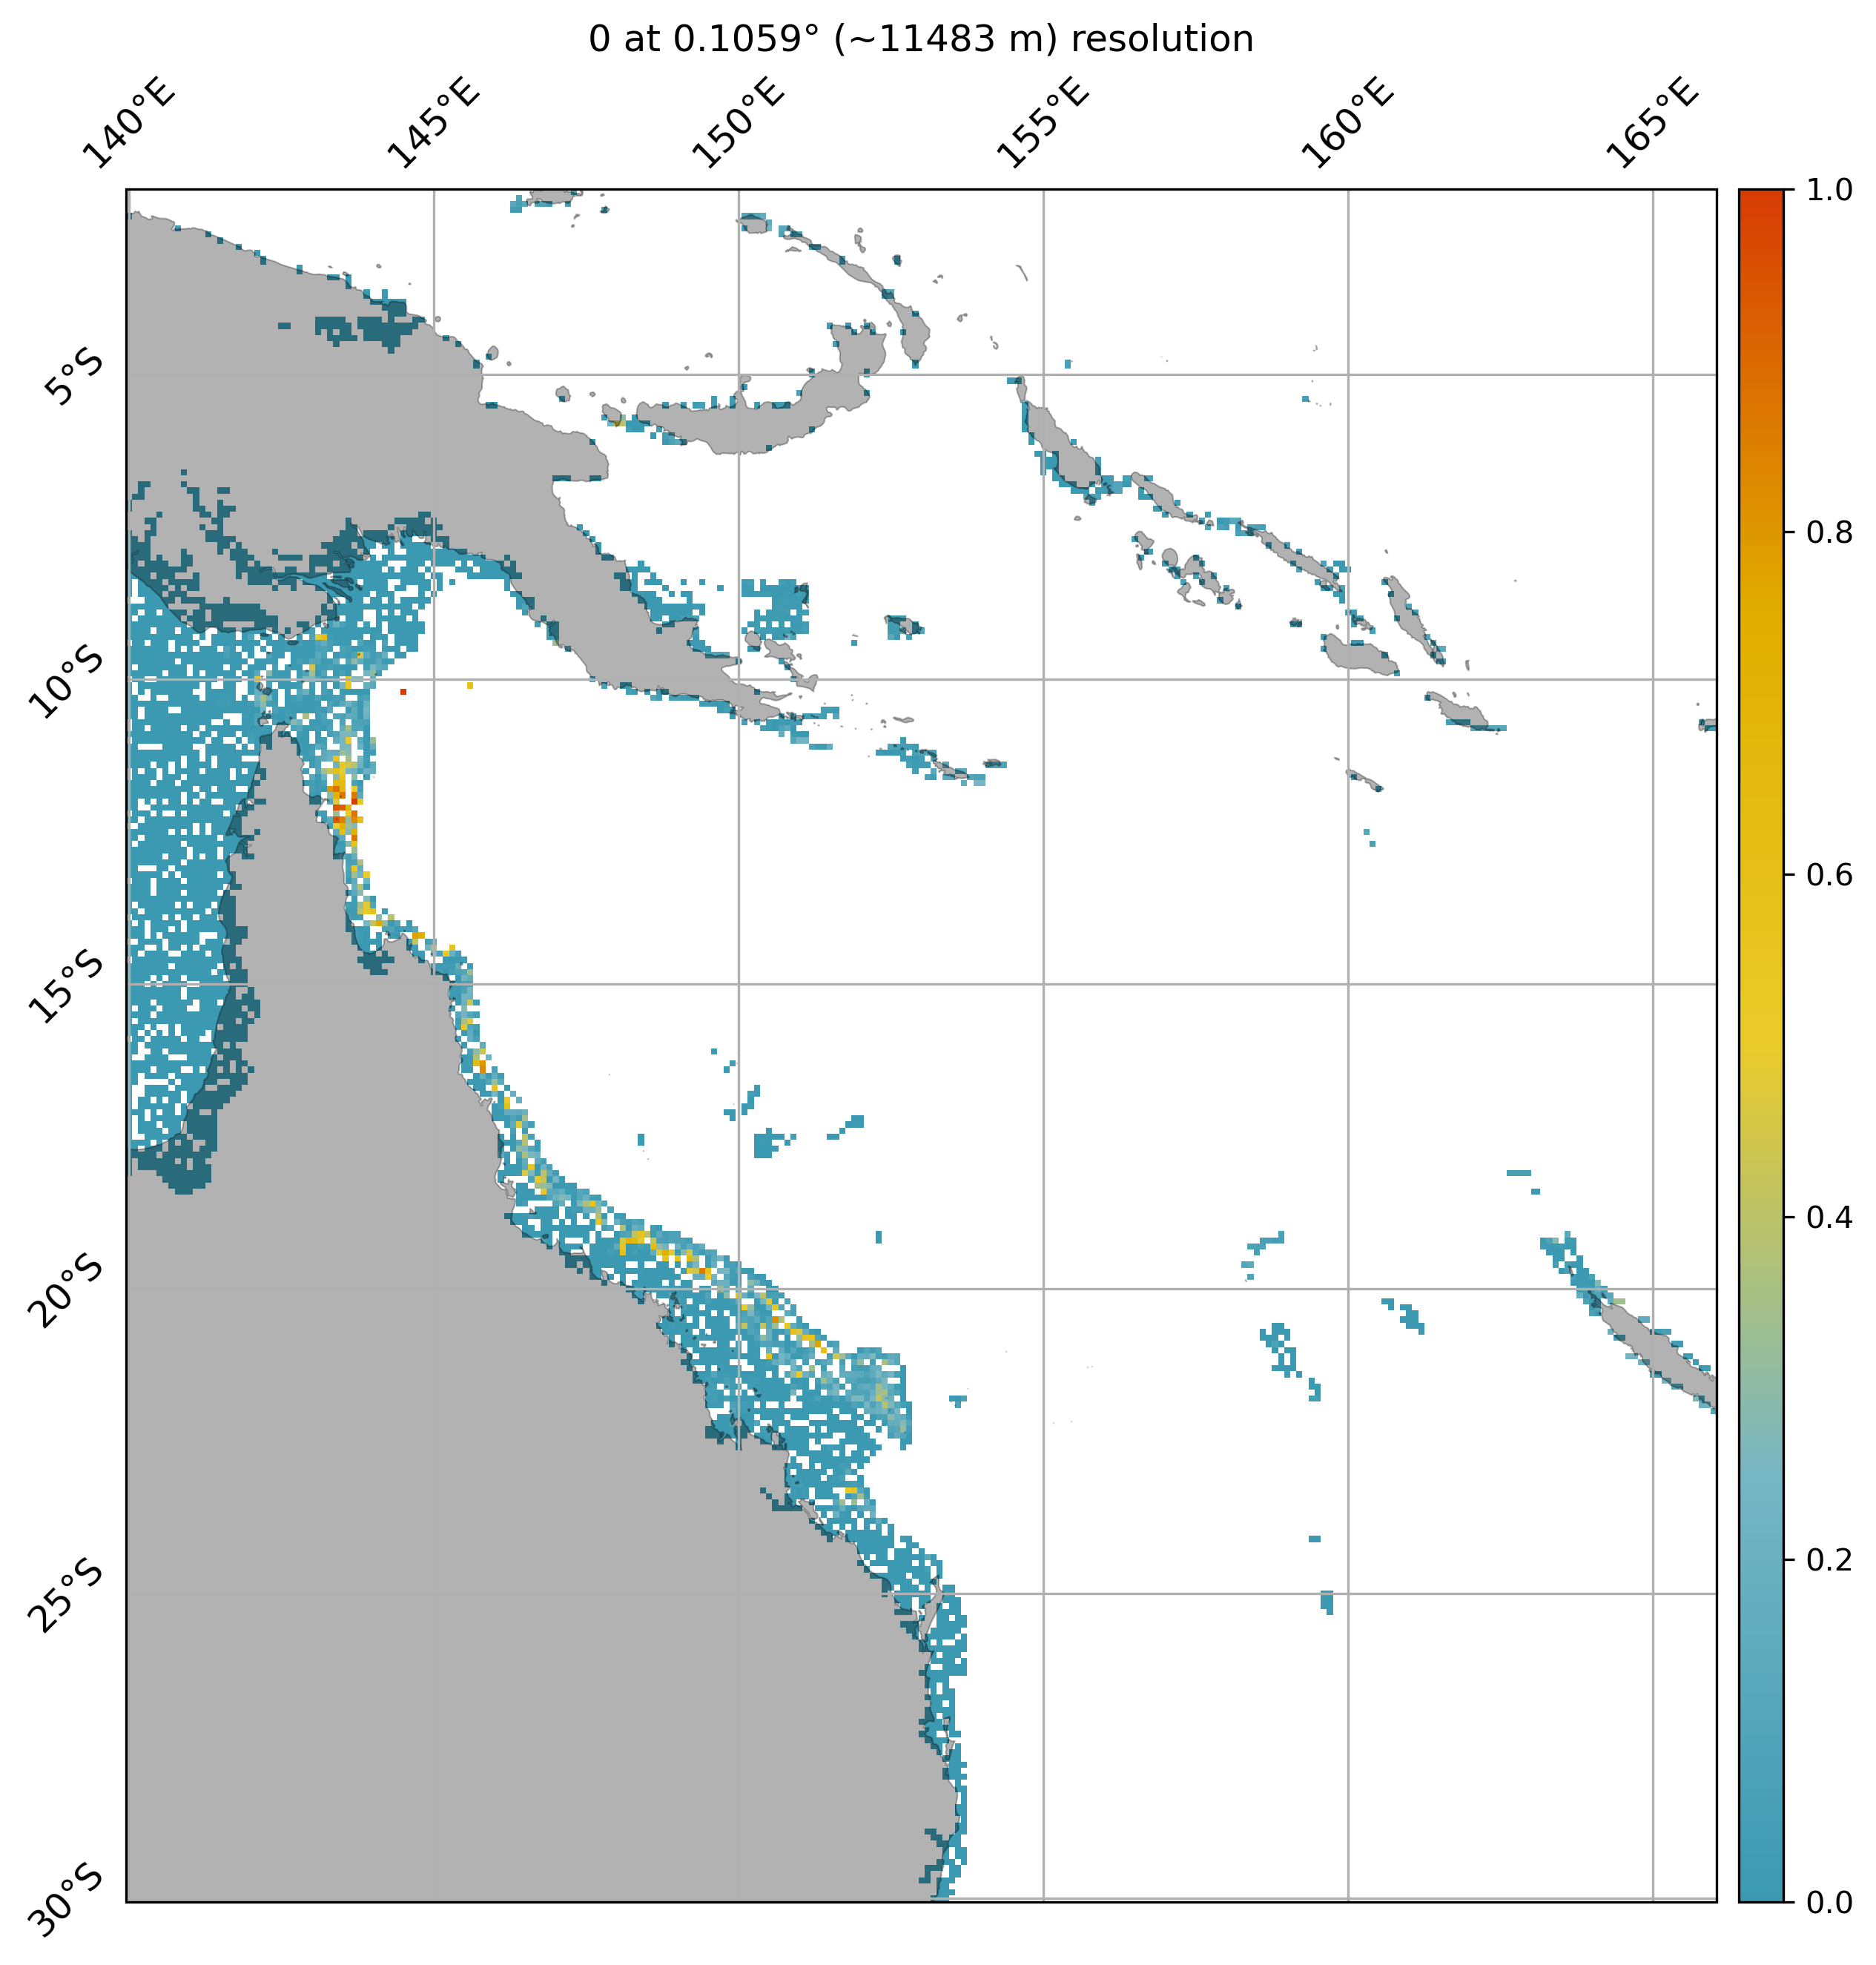

In [44]:
resolution = 0.1
res_str = utils.replace_dot_with_dash(str(round(resolution, 3)))
spatial_plots.plot_spatial(spatial_data.spatially_reform_data(pd.read_parquet(Path(config.ml_ready_dir) / "-100_25" / res_str / f"train_y_{res_str}_{spatial_extent_info}.parquet")[0]))

In [51]:
results[(results["file_paths_model_start_timestamp"] >= pd.Timestamp("2024-06-08")) & (results["depth_mask"] == "[-100, 25]")].resolution

181    1.00
182    1.00
183    0.75
184    0.75
185    0.50
186    0.50
187    0.25
188    0.25
189    0.10
190    0.10
191    0.01
192    0.01
Name: resolution, dtype: float64

In [76]:
for i in (results[(results["file_paths_model_start_timestamp"] >= pd.Timestamp("2024-06-08")) & (results["depth_mask"] == "[-100, 25]")].loc[results["model_code"].isin(["gb_reg", "mlp_reg"])]["file_paths_config"]):
    print(i)


/maps-priv/maps/rt582/coralshift/runs/1d/gb_reg/ID011_cmip6_unep_gebco_slope/ID011_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/1d/mlp_reg/ID010_cmip6_unep_gebco_slope/ID010_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/1d/gb_reg/ID012_cmip6_unep_gebco_slope/ID012_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/1d/mlp_reg/ID011_cmip6_unep_gebco_slope/ID011_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/0-75d/gb_reg/ID001_cmip6_unep_gebco_slope/ID001_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/0-75d/mlp_reg/ID000_cmip6_unep_gebco_slope/ID000_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/0-5d/gb_reg/ID000_cmip6_unep_gebco_slope/ID000_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/0-5d/mlp_reg/ID000_cmip6_unep_gebco_slope/ID000_cmip6_unep_gebco_slope_CONFIG.yaml
/maps-priv/maps/rt582/coralshift/runs/0-25

(0.0, 1.0)

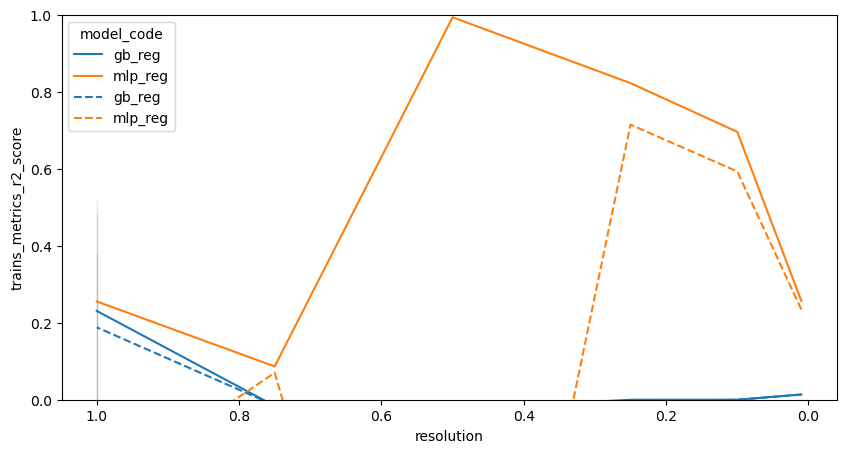

In [69]:
# compare results, specify that file_paths_model_start_timestamp column is a datetime object
results = pd.read_csv(Path(config.runs_csv), parse_dates=["file_paths_model_start_timestamp"])
# read results from today

today_results = results[(results["file_paths_model_start_timestamp"] >= pd.Timestamp("2024-06-08")) & (results["depth_mask"] == "[-100, 25]")]
# select columns where model_code is mlp_reg or gb_reg
today_results = results[(results["file_paths_model_start_timestamp"] >= pd.Timestamp("2024-06-08")) & (results["depth_mask"] == "[-100, 25]")].loc[results["model_code"].isin(["gb_reg", "mlp_reg"])]

# plot resolution against trains_metrics_r2_score and tests_metrics_r2_score

f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=today_results, x="resolution", y="trains_metrics_r2_score", hue="model_code", ax=ax)
sns.lineplot(data=today_results, x="resolution", y="tests_metrics_r2_score", hue="model_code", ax=ax, ls="--")
# reverse x axis
plt.gca().invert_xaxis()
plt.ylim(0,1)
# today_results

In [ ]:


# # train model
# model, latest_config_fp, ret_client = static_models.RunStaticML(
#     model_code,
#     trains=(X_trains, y_trains),
#     tests=(X_tests, y_tests),
#     vals=(X_tests, y_tests),
#     config_info=config_info,
#     additional_info=resolution,
#     cluster=cluster,
#     client=client
# ).run_model()

In [ ]:
model = file_ops.read_pickle("/maps-priv/maps/rt582/coralshift/runs/0-1d/rf_reg/ID017_cmip6_unep_gebco_slope/ID017_cmip6_unep_gebco_slope_MODEL.pickle")

ml_results.AnalyseResults(
        model=model,
        model_code=model_code,
        trains=(X_trains, y_trains),
        tests=(X_tests, y_tests),
        vals=(X_tests, y_tests),
        config_info=config_info,
).analyse_results()



# Dataset splitting

In [ ]:
def generate_chunk_bounds(degrees_lat, degrees_lon, lat_range=(-90, 90), lon_range=(-180, 180), lat_buffer=1, lon_buffer=1):
    """
    Generate latitude and longitude bounds for chunks spanning a specified range.

    Parameters:
    - degrees_lat (float): Number of degrees on each side of latitude chunks.
    - degrees_lon (float): Number of degrees on each side of longitude chunks.
    - lat_range (tuple): Range of latitudes (default: (-90, 90)).
    - lon_range (tuple): Range of longitudes (default: (-180, 180)).

    Returns:
    - lat_bounds (list): List of latitude bounds for each chunk.
    - lon_bounds (list): List of longitude bounds for each chunk.
    """

    # Calculate the number of latitude and longitude chunks
    N_lat = int((lat_range[1] - lat_range[0]) / degrees_lat)
    N_lon = int((lon_range[1] - lon_range[0]) / degrees_lon)

    # Calculate the step size for latitude and longitude
    lat_step = (lat_range[1] - lat_range[0]) / N_lat
    lon_step = (lon_range[1] - lon_range[0]) / N_lon

    # Generate latitude bounds
    lat_bounds = [(lat_range[0] + i * lat_step, lat_range[0] + (i + 1) * lat_step) for i in range(N_lat)]

    # Generate longitude bounds
    lon_bounds = [(lon_range[0] + i * lon_step, lon_range[0] + (i + 1) * lon_step) for i in range(N_lon)]

    lat_bounds = [lat_bounds[0]-buffer if buffer else lat_bounds[0] for buffer in [lat_buffer, 0]]
    
    return lat_bounds, lon_bounds

# Example usage:
degrees_lat = 10
degrees_lon = 10
lat_bounds, lon_bounds = generate_chunk_bounds(degrees_lat, degrees_lon)

for 
